# GESTION DE PORTEFEUILLE - Assignement 1


#### Hugo Lamarre - HEC Montréal
#### Hiver 2023

### Etudiants

CARON Sébastien  - 11271997 

LEPEYTRE Vincent - 11237013

NONGUIERMA Harold  -

TOURÉ Ousmane  -

In [1]:
import importlib
import numpy as np
import Functions as f

importlib.reload(f)


import numpy as np
import pandas as pd
from scipy import optimize
import scipy.optimize as sco



#### Data Importation

In [2]:
path_data = "48_Industry_Portfolios.CSV"
path_rf = "SOFR30DAYAVG.xls"
path_regression = "iShares MSCI USA Factor ETF bis1.xlsx"

In [3]:
### Industries selected : 

Data_select1_names = ['Mines','Guns','Hshld','Oil','Txtls']

Data_select2_names = ['Mines','Guns','Hshld','Oil','Txtls','Agric', 'Util', 'Chems', 'Drugs', 'Telcm']

In [4]:
### Monthly data on 48 Industry Portfolios from Ken French’s website

Data = f.Load_ind_data(path_data)["Data"]
Data = Data[Data.index >= '2000-01'] # We keep only the data after 2000

Data_select = Data[Data_select1_names]

Industrie_selected = Data_select.columns


/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m')


In [5]:
### Risk free asset : 30-Day Average SOFR, Percent, Daily, Not Seasonally Adjusted

Expected_Risk_free = f.Load_rf(path_rf)/100


In [6]:
### Data for the determination of expected returns :

Variable_regression = f.Load_lasso_variable(path_regression)

## Determination of expected returns
### Multiple linear regression with regularization by lasso method :

#### 1/ Data set split betwen  train and test set : 

In [7]:
# Data use for the split : 

First_factor_obs = '2013-09-01'
Date_train = '2020-01-01' # Train set end
Date_test = '2021-06-01' # Test set beginning 
Last_date = '2022-12-01'

Variable_regression = Variable_regression[Variable_regression.index >= First_factor_obs]

Data_regression_lasso = f.Split_dataset(Data,Variable_regression,First_factor_obs,Date_train,Date_test,Last_date)

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])


#### 2/ Prediction : 

In [8]:
Resultat_prediction  = f.Lasso_regression(Data_regression_lasso)

#### 3/ Performance of  prediction : 

In [9]:
# R_squared moyen (Train set) :
Resultat_prediction.loc['R_squared_train'].median()

12.827383496619976

In [10]:
# R_squared moyen (Test set) :
Resultat_prediction.loc['R_squared_test'].median()

5.941404240033494

In [11]:
# MSE lasso prediction / MSE with naive historical mean :
Resultat_prediction.loc['ratio_mse'].median()

0.9281998902110484

#### 4/ Results : 

In [12]:
# Select only the prediction where the lasso approch perform better on the train set base on MSE ratio and R square

E_return_select = f.select_pred(Resultat_prediction, Data)

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)


In [13]:
E_return = E_return_select[Data_select1_names]

## Determination of the covariance matrix :

In [14]:
## Covariance matrix for selection 1 of industries : 
E_cov_total = f.Ledoit_wolf(Data/100)

E_cov_1 = (E_cov_total[Data_select1_names].loc[Data_select1_names])

E_cov_2 = (E_cov_total[Data_select2_names].loc[Data_select2_names])

## Question 1
### (a) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.
Display each industry portfolio in the chart.

#### Estimation of the covariance-matrix and expected return   :

In [15]:
# Expected return : other possible approach simple machine learning with technical indicator 
#E_return = g.annualize_rets(Data_select/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
#E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100
K = 5 #On veut 5 Assets

##### Determination of the optimal  portfolio  for a given return (with Short Sell) :

Restricted license - for non-production use only - expires 2024-10-28


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

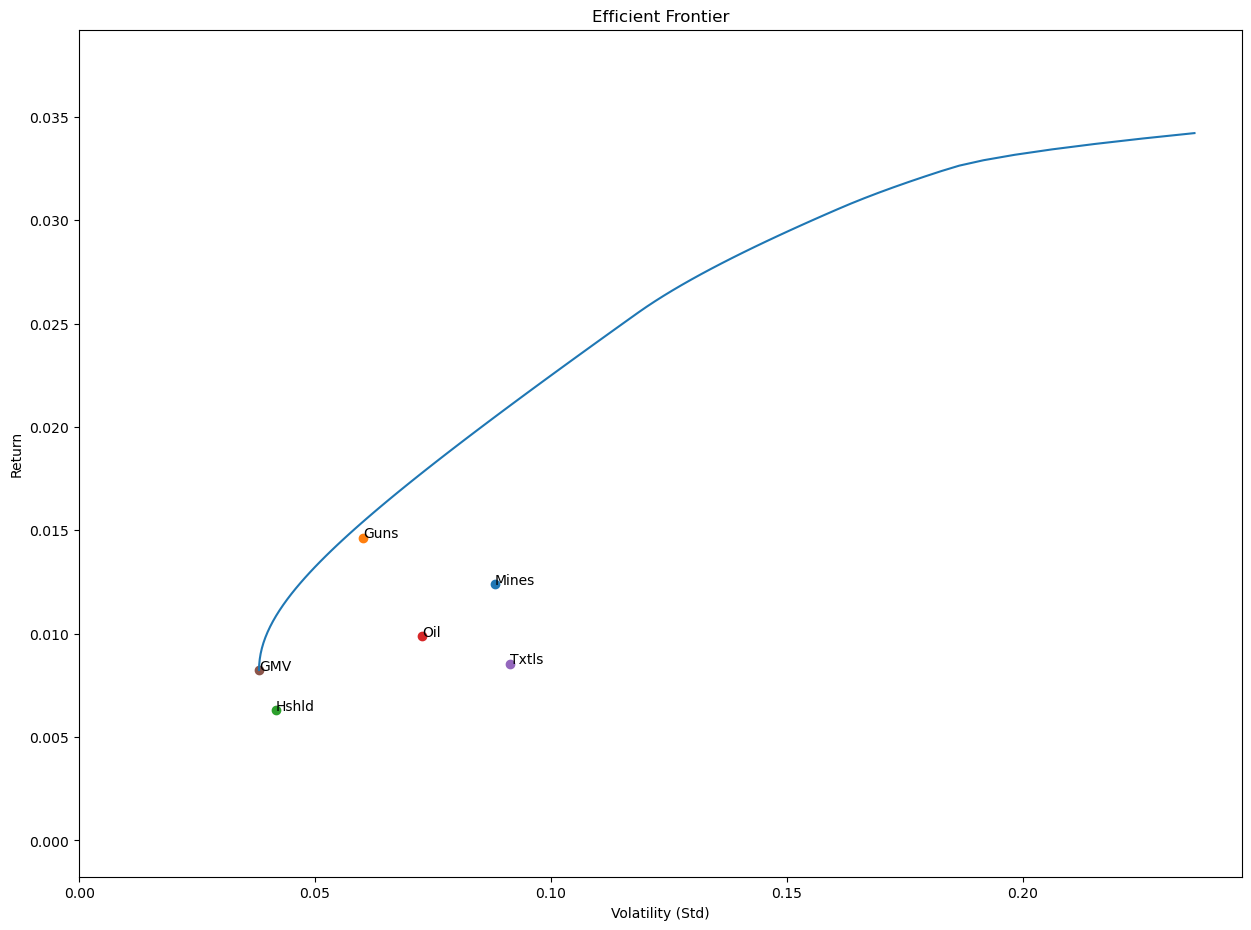

In [16]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=False, show_gmv=True)

### (b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

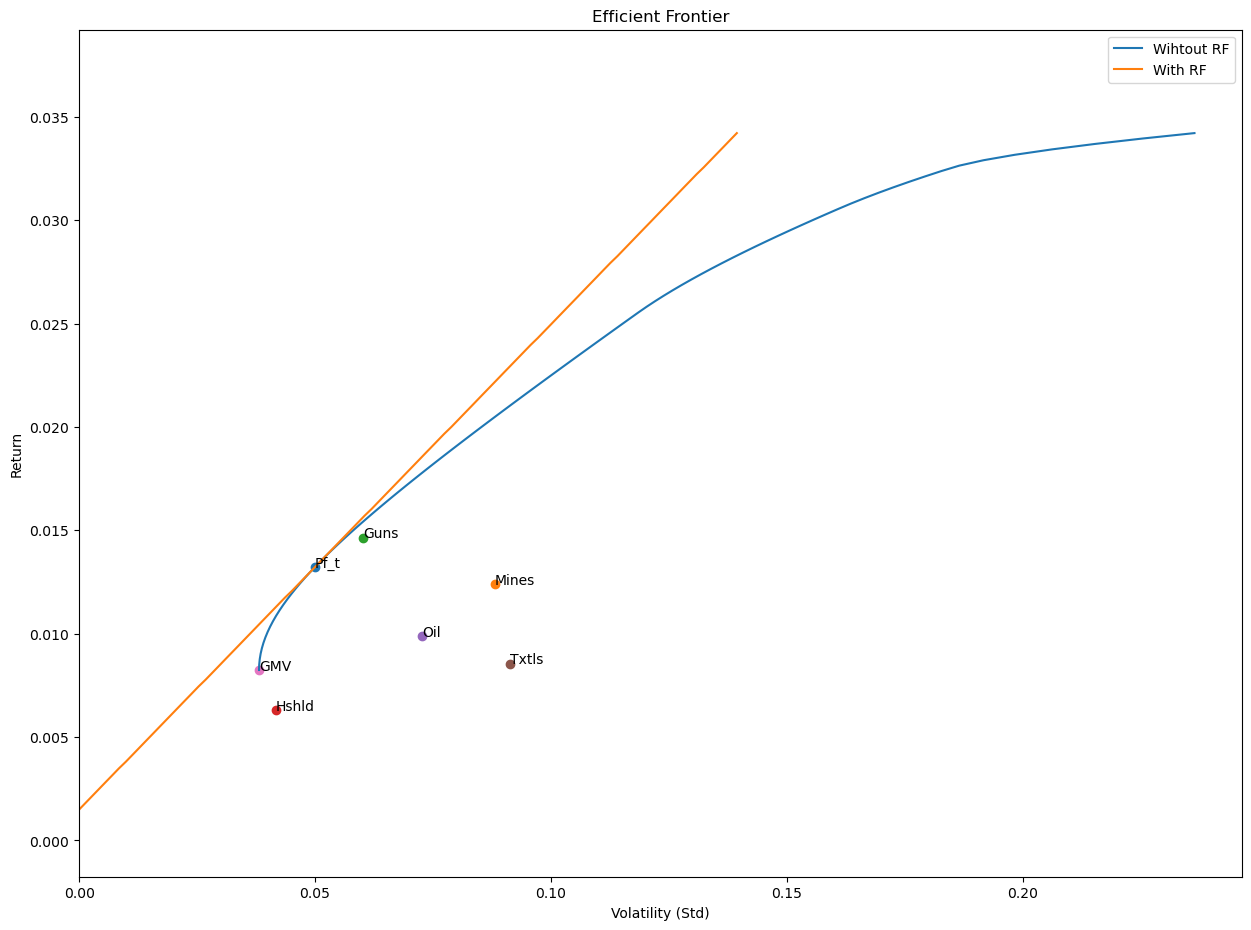

In [17]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### Explanations: 

### (c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset


In [18]:
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF = 100, bounds= (-2,2))
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
19,0.1862,0.7213,0.2135,0.042,-0.163,0.013227,0.05,0.234678


### (d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

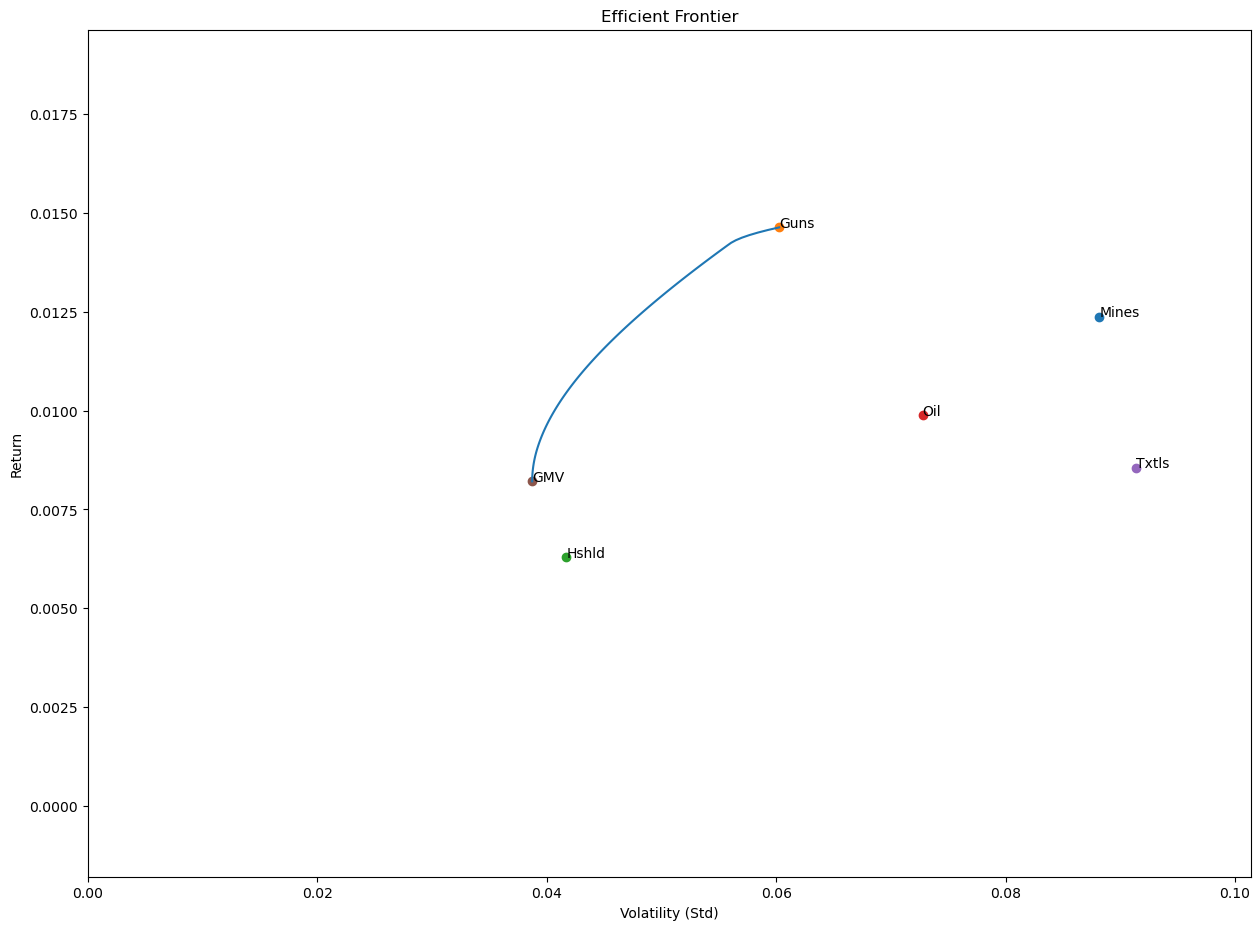

In [19]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF, bounds = (0, 1), show_cml=False, show_gmv=True)

#### Explain how the mean-variance frontier has changed with the constraint: (To continue)

### (e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

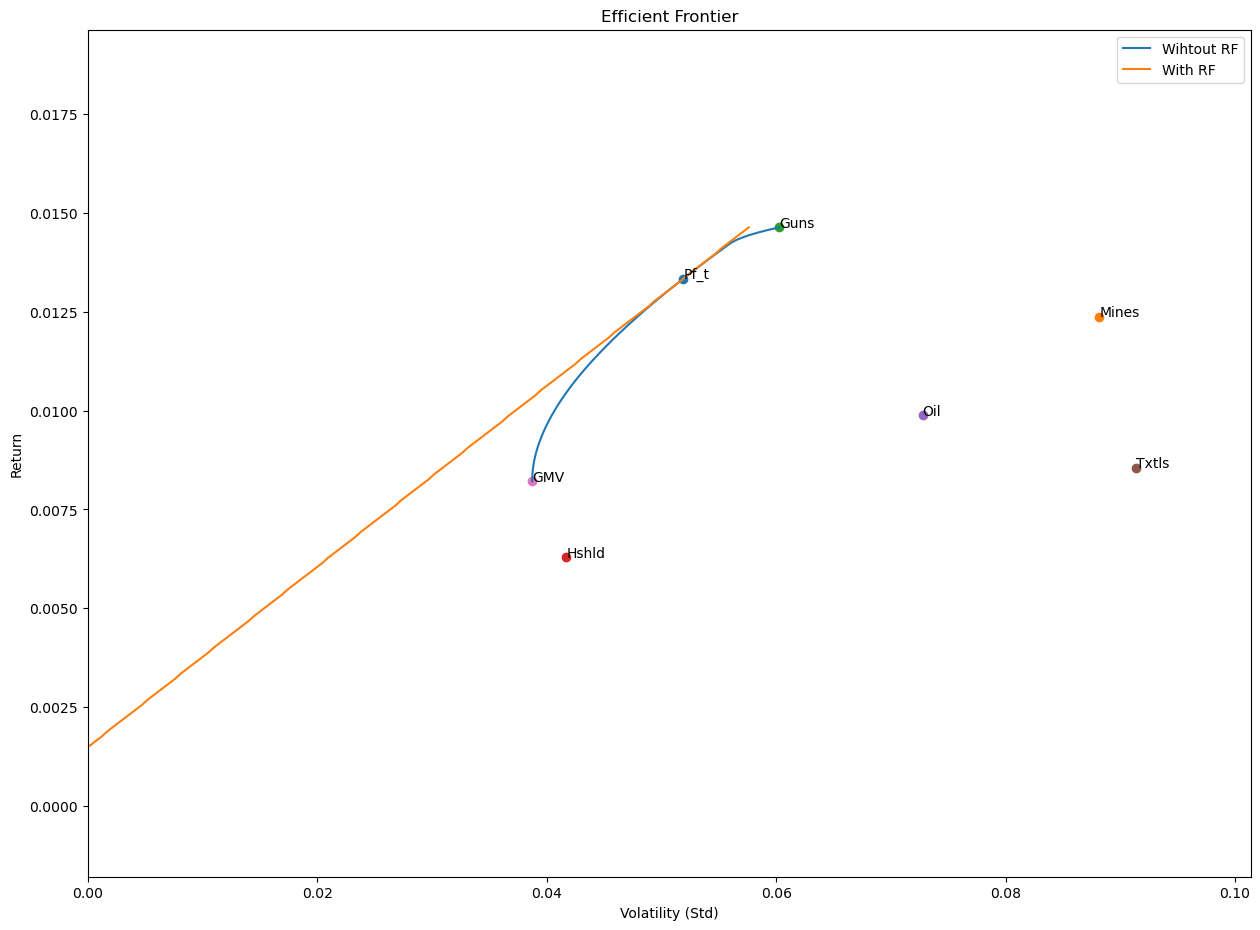

In [20]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF, bounds = (0, 1), show_cml=True, show_gmv=True)

#### Explain how the mean-variance frontier has changed with the constraint:

(To Continue)

### (f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [21]:
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF = 100, bounds= (0,1))
result



,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
79,0.152,0.726,0.1047,0.0172,0.0,0.013337,0.051889,0.228262


Explain:

### (g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

In [22]:
#On pourrait randomnize le sampling

Data_select2 = Data[Data_select2_names]

#E_return_M_2 =Resultat_prediction[Data_select2_names].loc['E_R'].T

E_return_2 = E_return_select[Data_select2_names]
#E_return_2 = f.annualize_rets_prediction(E_return_M_2, 12)

# Expected return : other possible approach simple machine learning with technical indicator 
#E_return = g.annualize_rets(Data_select2/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
#E_cov = Data_select2.cov() # Just for test
Nbr_PTF = 100
K = 10

#### g-(a) Graph the mean-variance frontier without risk-free asset of the selected 10 industry portfolios.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

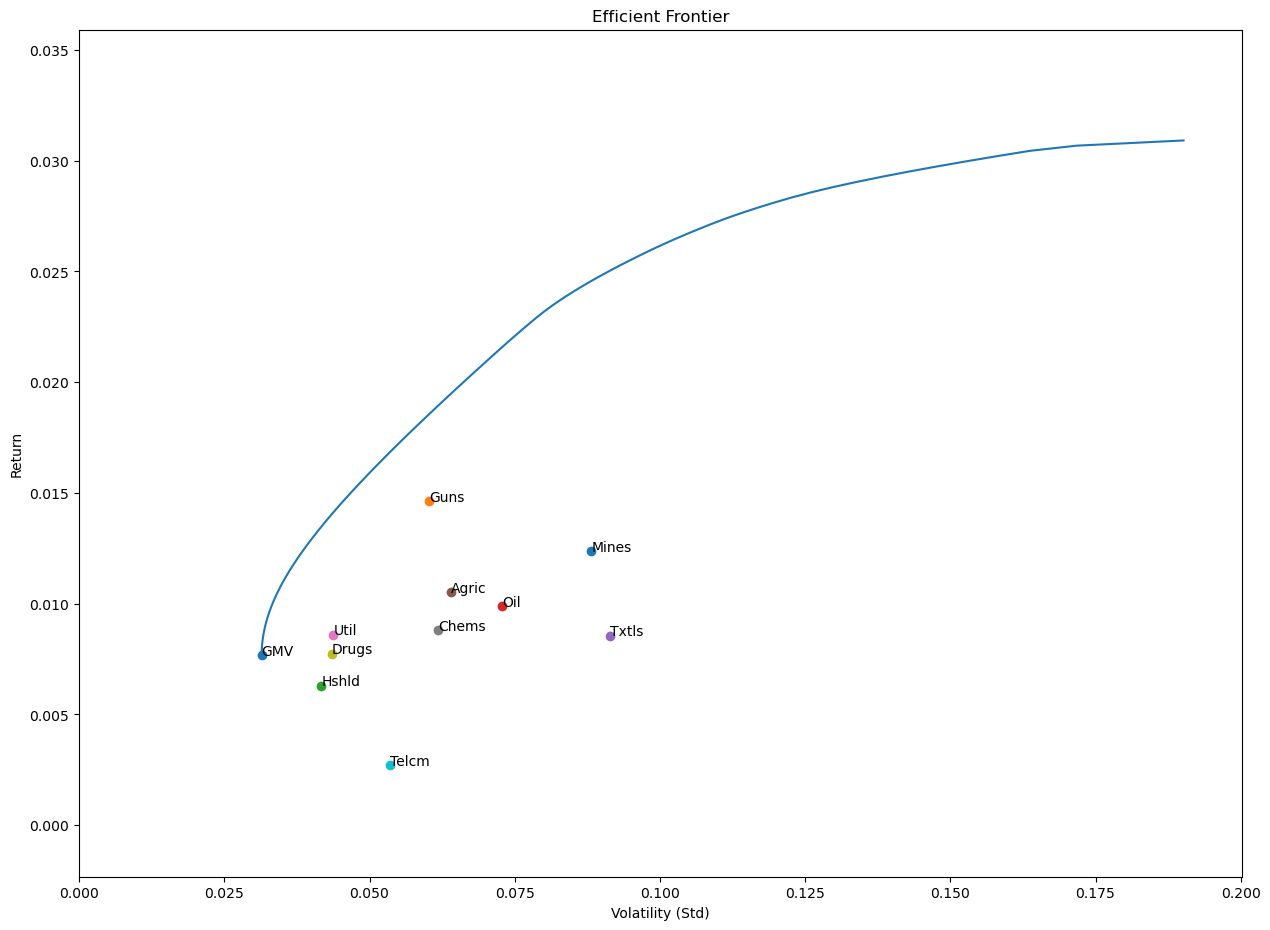

In [23]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (-1,1), show_cml=False, show_gmv=True)

#### g-(b) Graph the mean-variance frontier with risk-free asset of the selected 10 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

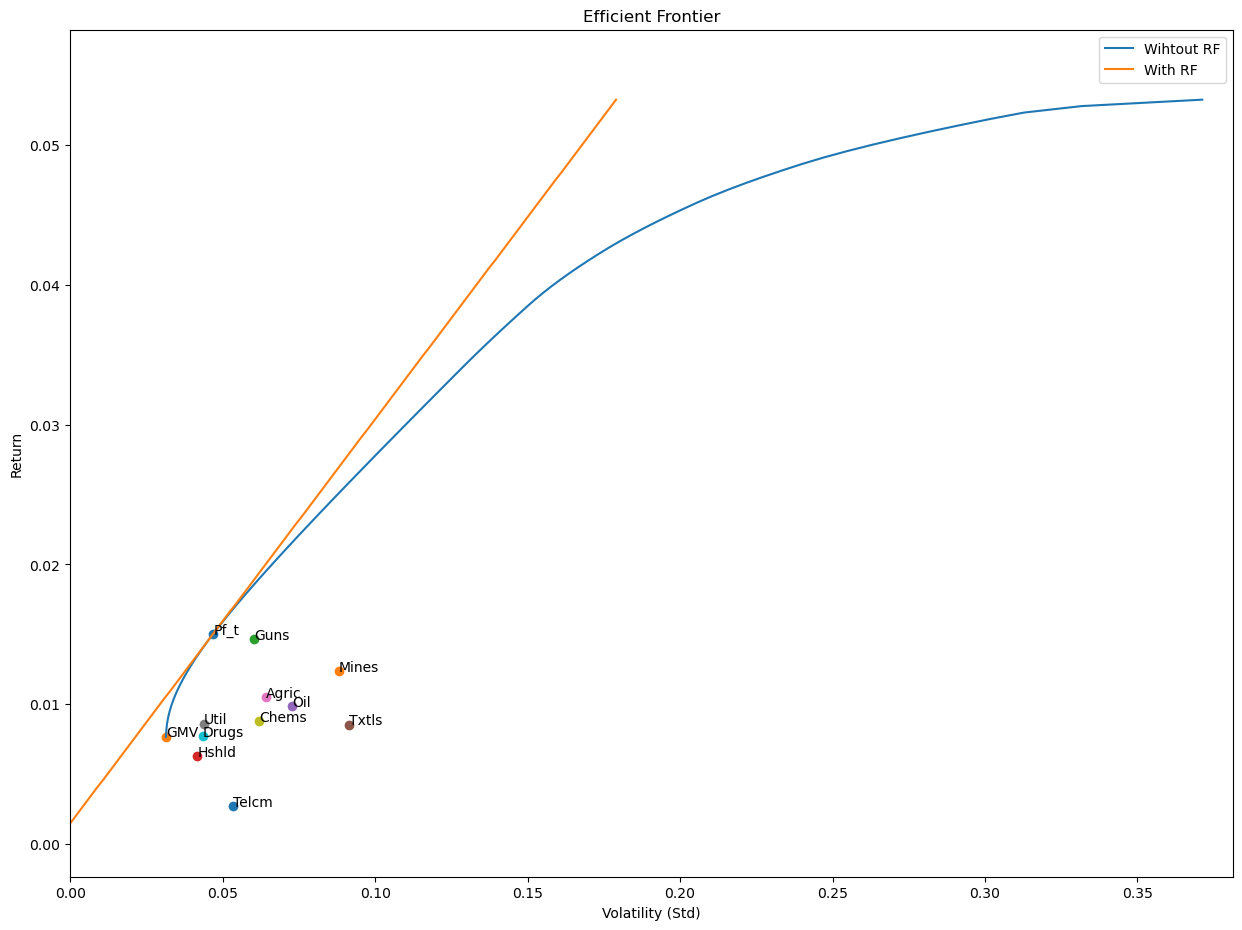

In [24]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### g-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [25]:
result = f.tangent_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K , Nbr_PTF, bounds= (-2,2))

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
16,0.167,0.5157,0.0289,-0.0284,-0.044,0.2252,0.3484,-0.1488,0.4015,-0.4654,0.015033,0.046865,0.28892


#### g-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

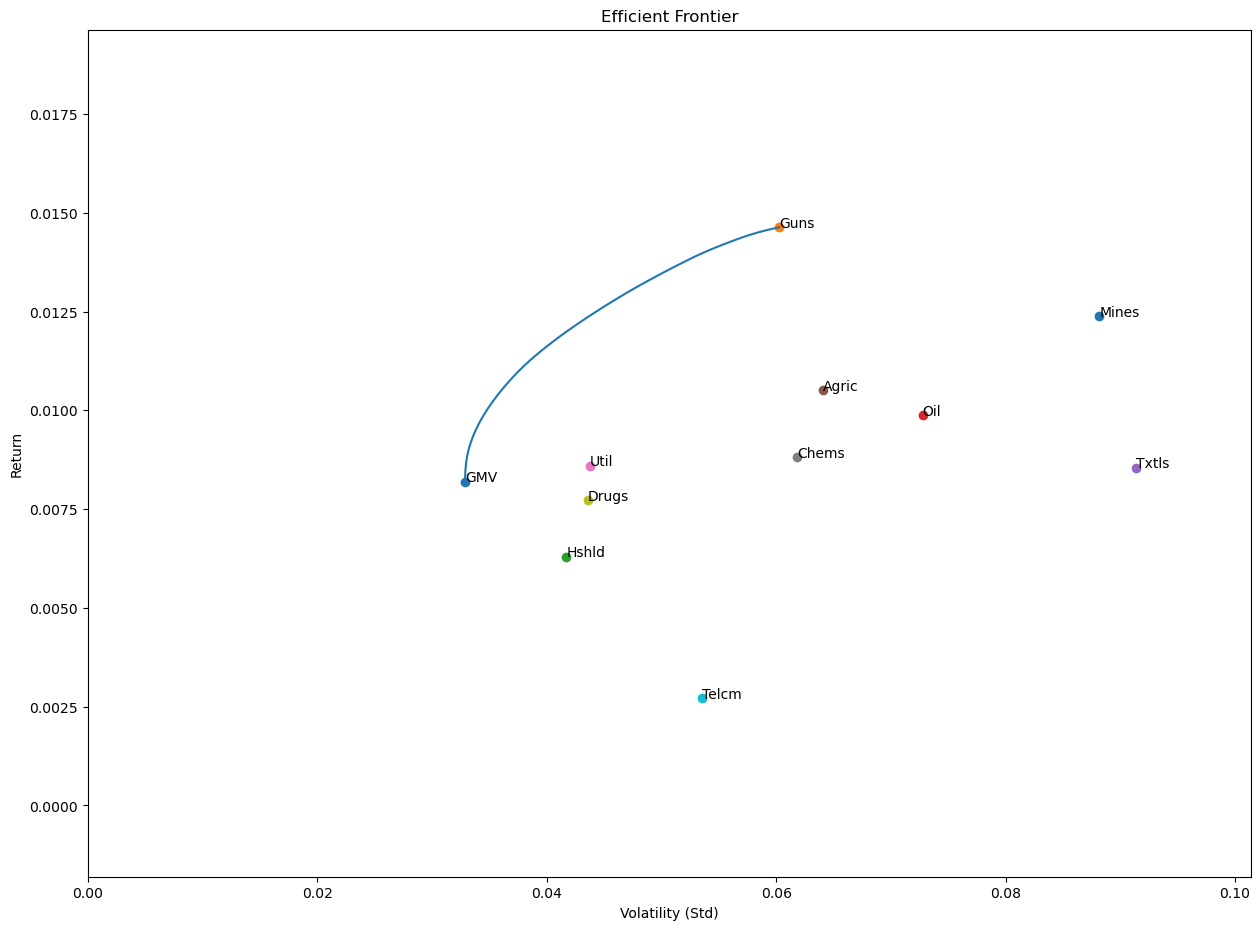

In [26]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=False, show_gmv=True)

#### g-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

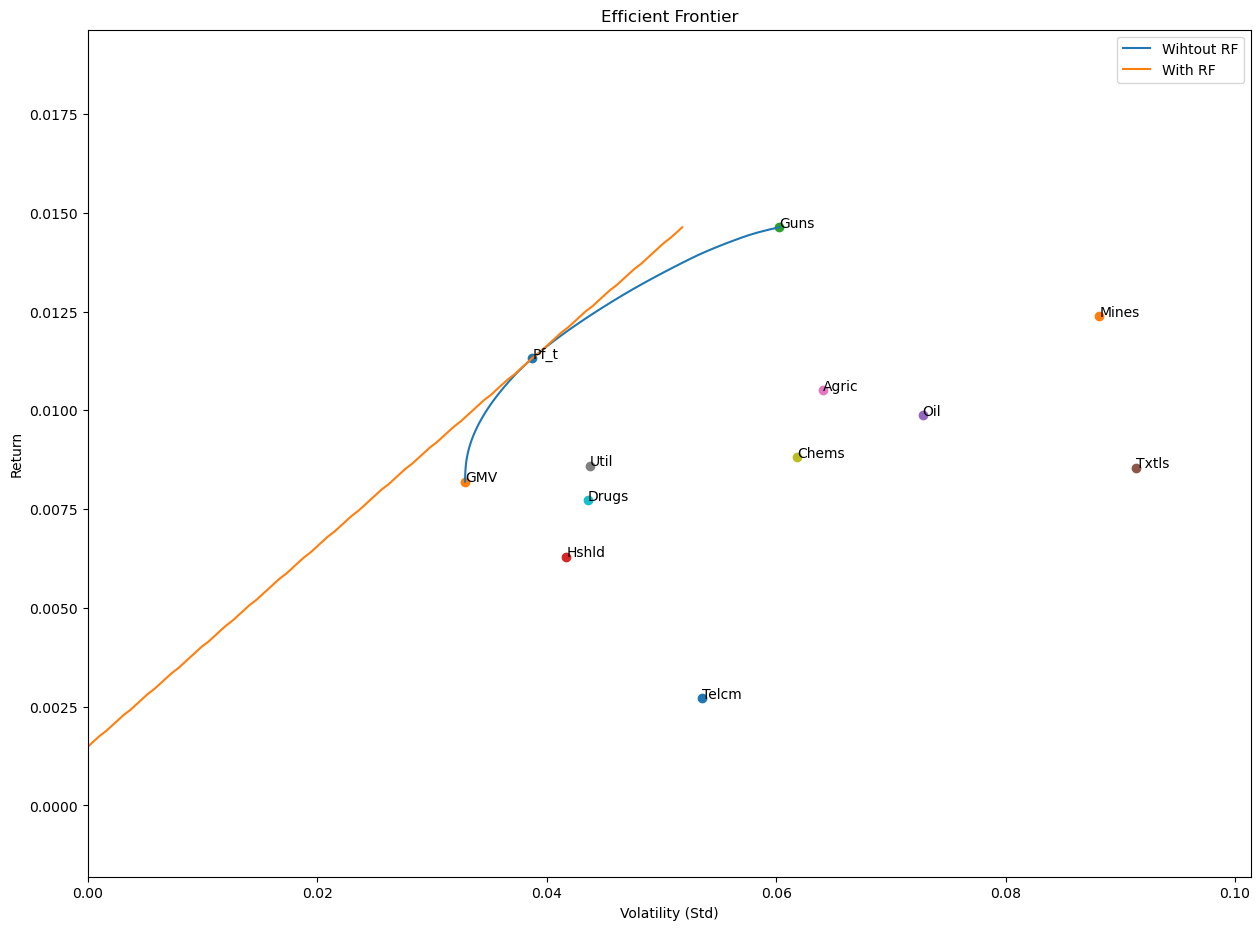

In [27]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=True, show_gmv=True)

#### g-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [28]:
result = f.tangent_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K , Nbr_PTF, bounds= (0,1))

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
48,0.0015,0.4247,0.0,0.0,0.0,0.1513,0.2611,0.0,0.1615,0.0,0.011318,0.038739,0.253635


### (h) The investment policy statement now limits you to invest in up to 3 industry portfolios from the original list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?

In [29]:
#Est-ce qu'on fait une contrainte dans l'optimisateur?
#On peut prendre les 3 maximum weight in abs(value)

#E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100
K=3

#### h-(a) Graph the mean-variance frontier without risk-free asset of the selected 3 industry portfolios. vs 5


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

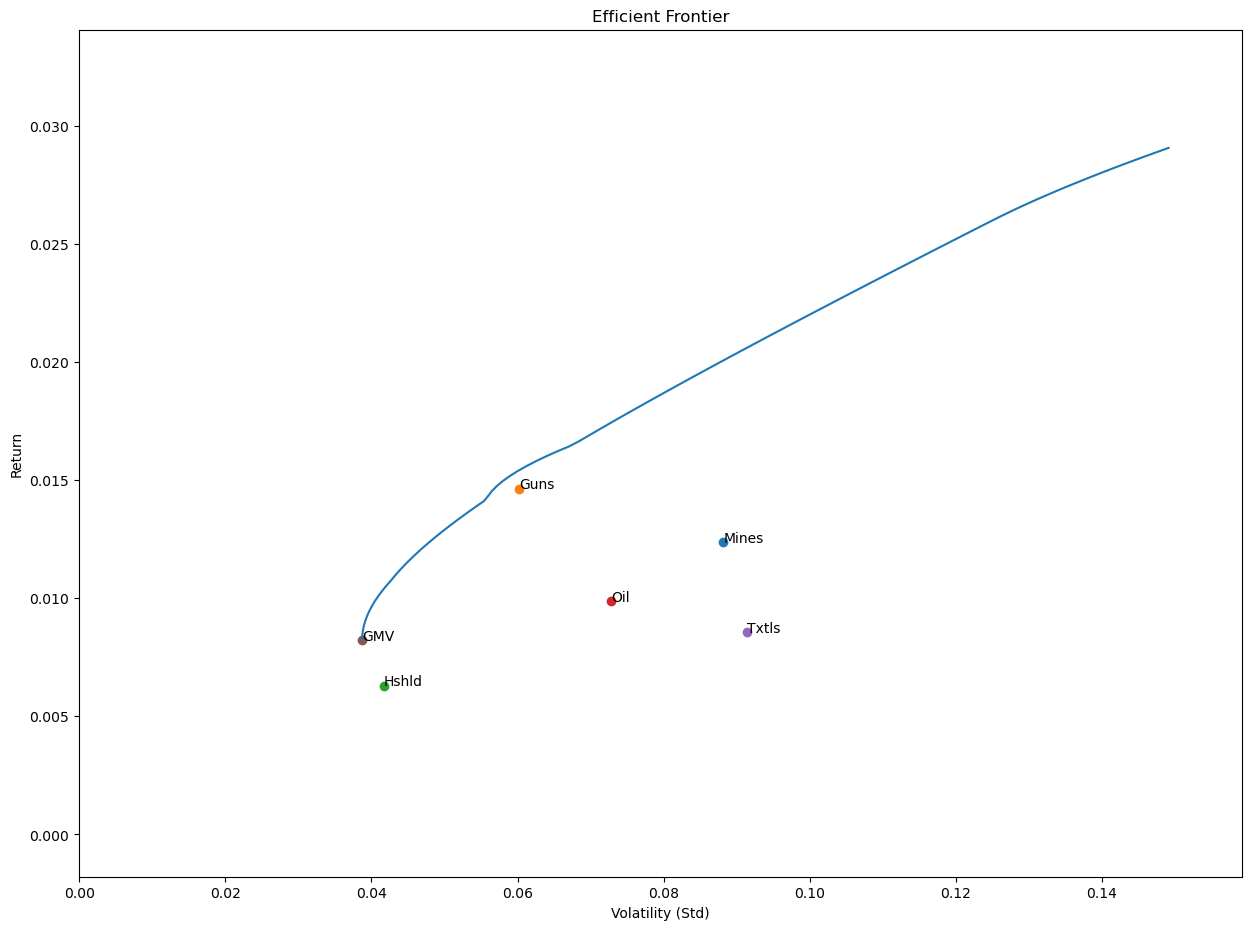

In [30]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=False, show_gmv=True)



#### h-(b) Graph the mean-variance frontier with risk-free asset of the selected 3 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

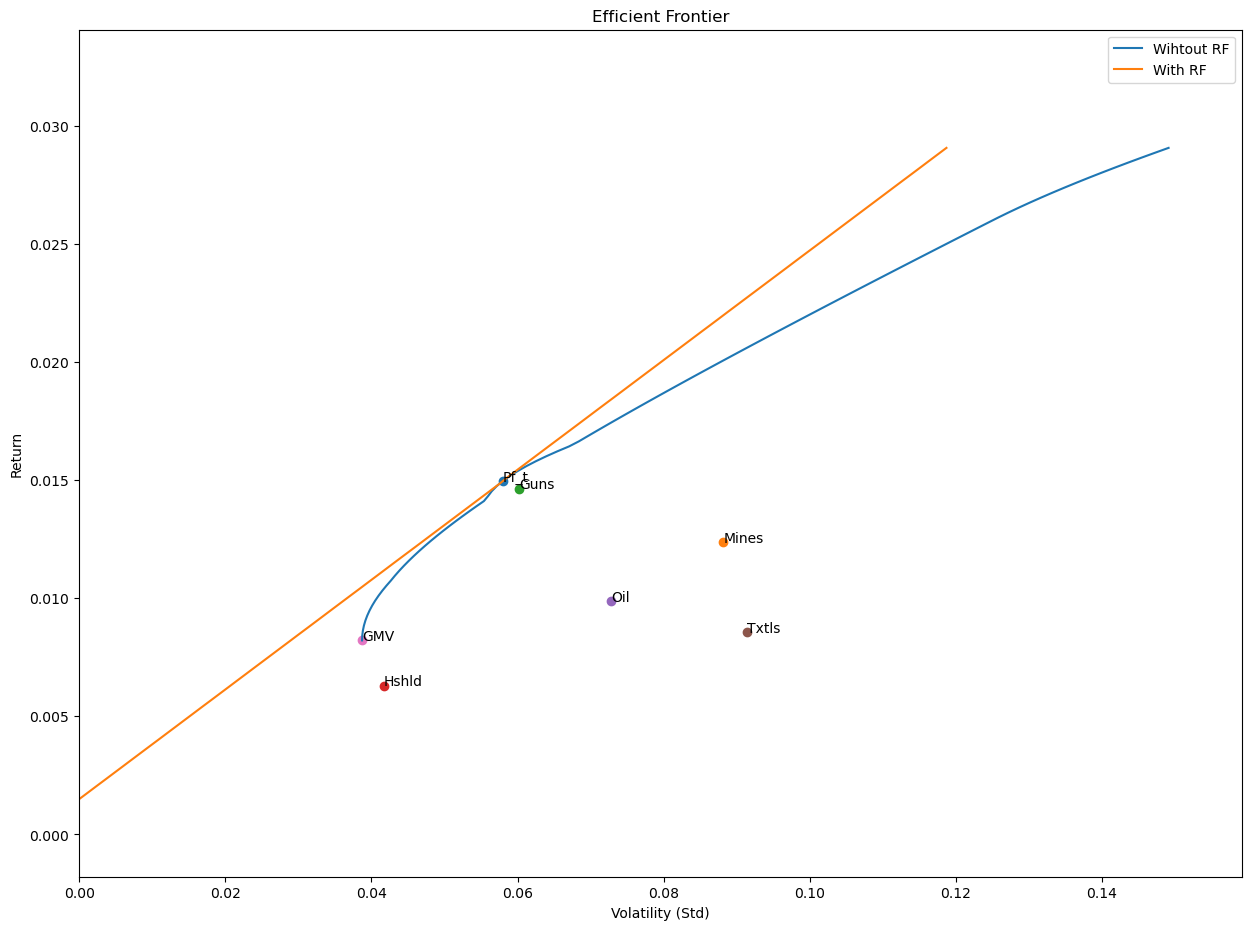

In [31]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### h-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [32]:
#Trouver portefeuille maximum sharp ratio (Regler probleme de la fonction ou expliquer)
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds= (-2,2))
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
32,0.257,0.8896,0.0,0.0,-0.1467,0.014947,0.057949,0.232178


<AxesSubplot:xlabel='Standard_deviation'>

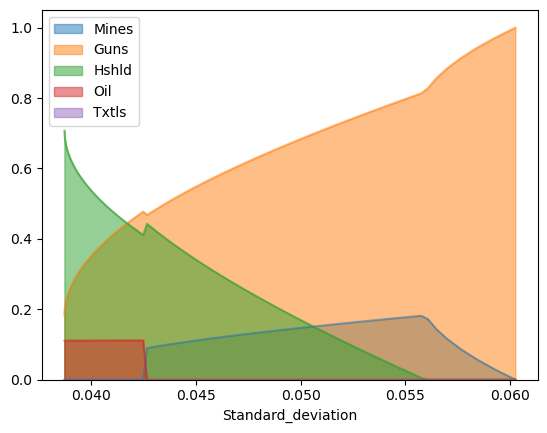

In [33]:

f.areaplot(E_return, E_cov_1, K, Nbr_PTF, bounds=(0,1))

<AxesSubplot:xlabel='Standard_deviation'>

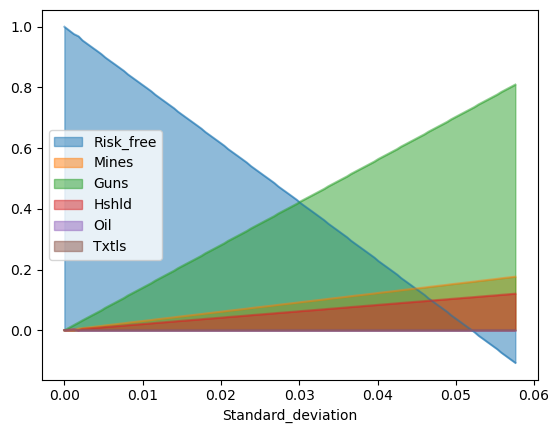

In [34]:
f.areaplot_wrf(E_return, E_cov_1, K, Expected_Risk_free, Nbr_PTF, bounds=(0,1))

#### h-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

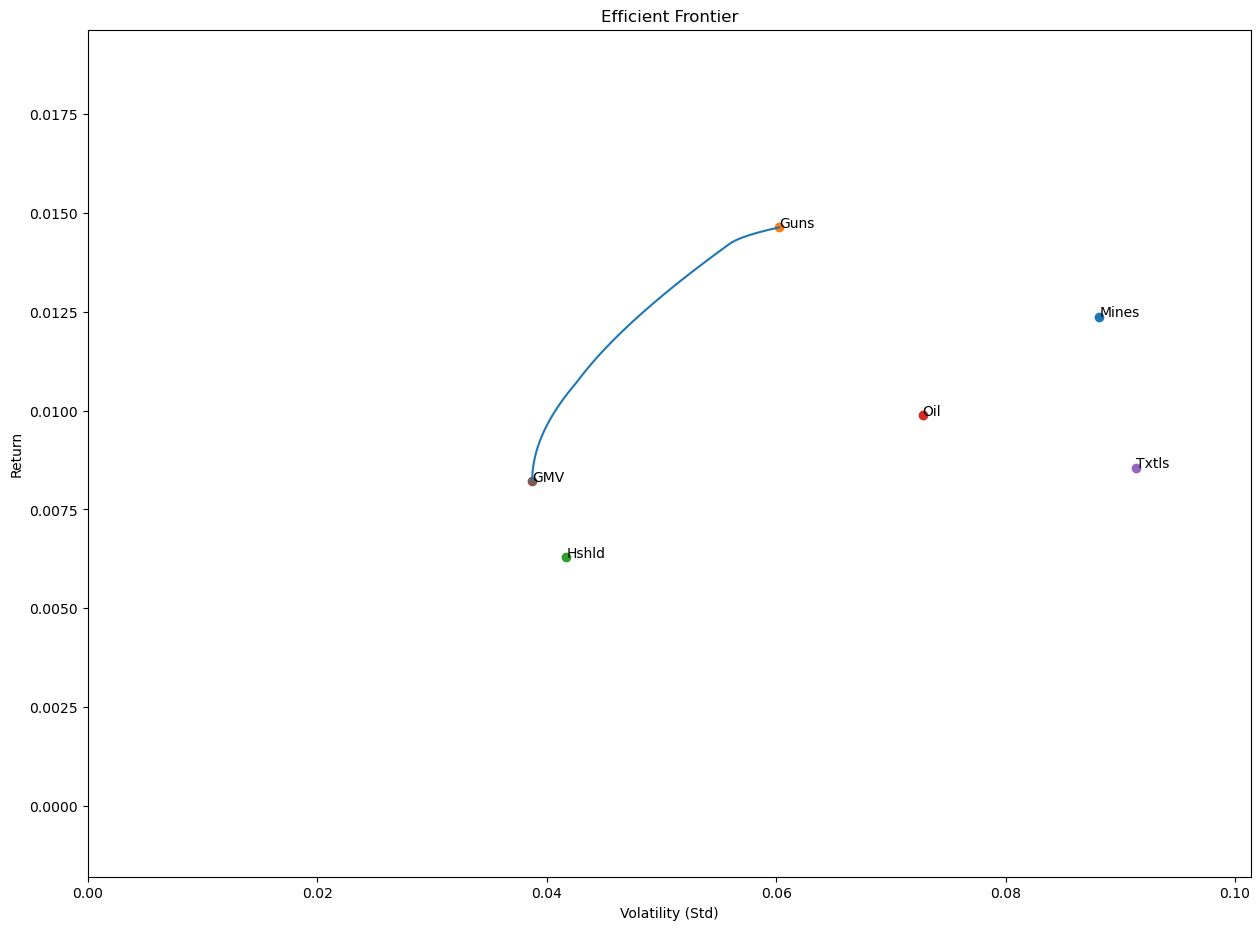

In [35]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=False, show_gmv=True)

#### h-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

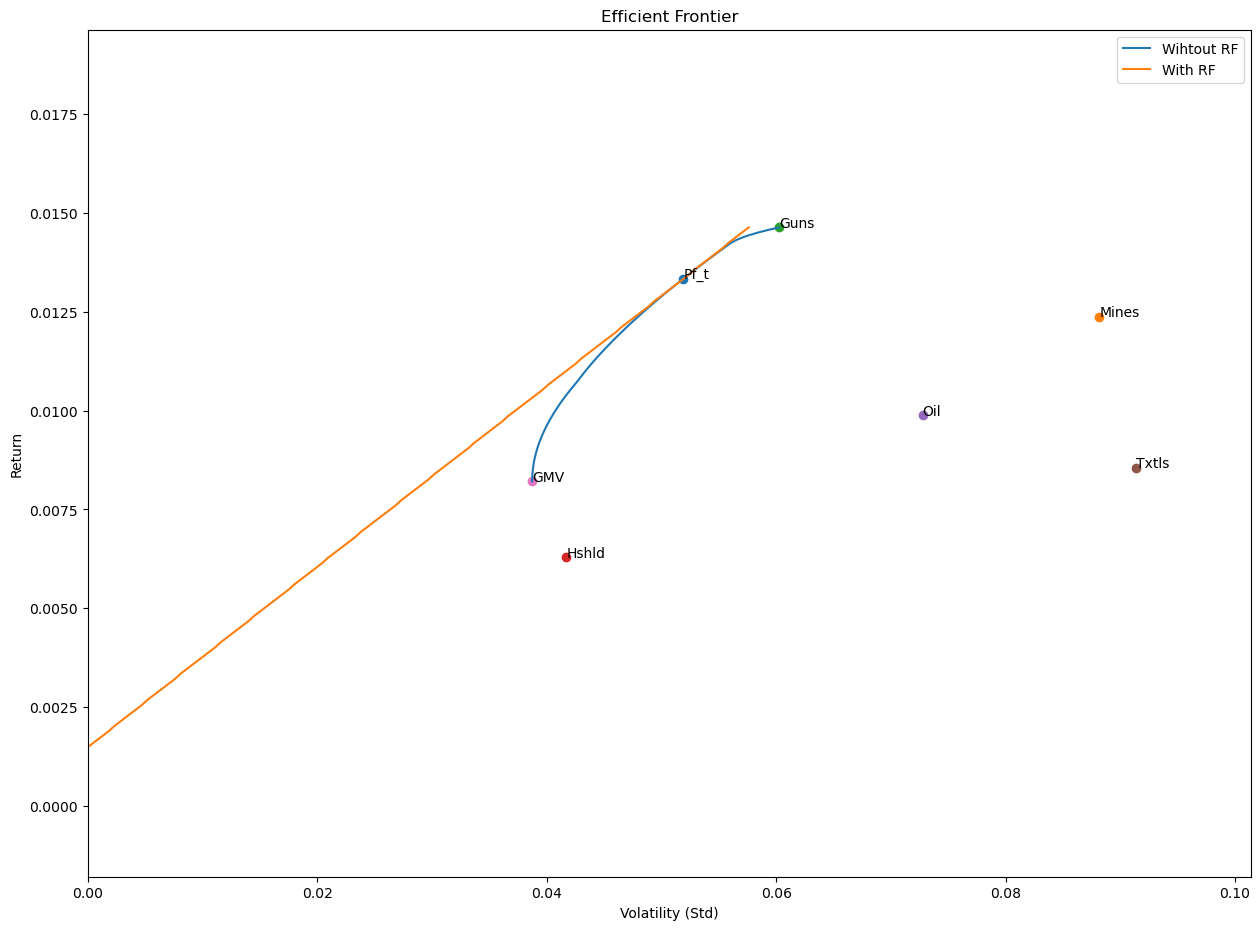

In [36]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=True, show_gmv=True)

#### h-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [37]:
#Trouver portefeuille maximum sharp ratio
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds= (0,1))
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
79,0.1589,0.7284,0.1127,0.0,0.0,0.013337,0.051899,0.228219


<AxesSubplot:xlabel='Standard_deviation'>

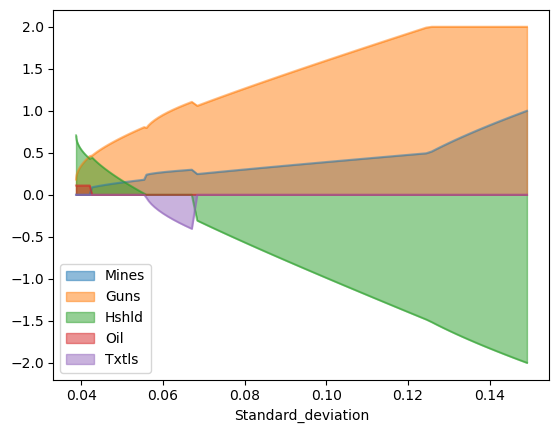

In [38]:
f.areaplot(E_return, E_cov_1, K, Nbr_PTF, bounds=(-2,2))

<AxesSubplot:xlabel='Standard_deviation'>

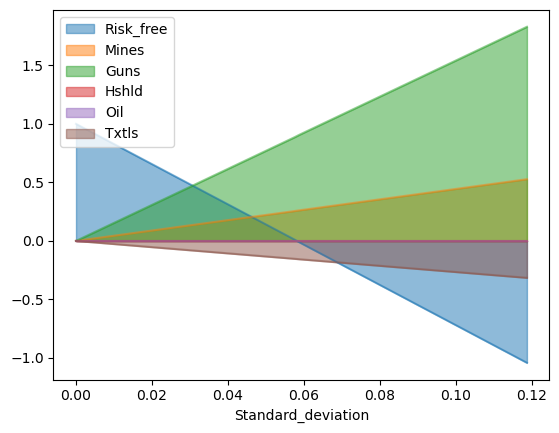

In [39]:
#Axis gauche pondération
f.areaplot_wrf(E_return, E_cov_1, K, Expected_Risk_free, Nbr_PTF, bounds=(-2,2))

## Question 2

### (a) Implement the portfolio resampling approach to demonstrate the effect of estimation uncertainty on the mean-variance frontier and tangent portfolios computed in Question 1.

### (a-1) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.¶Display each industry portfolio in the chart.

In [40]:
Nsim=100
Nbr_PTF = 100
K = 5 #On veut 5 Assets
Resample1=f.boostrap(Data_select,Nsim)#On genere nos simulation par Bootstraap

In [41]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (-2,2))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (-2,2))

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

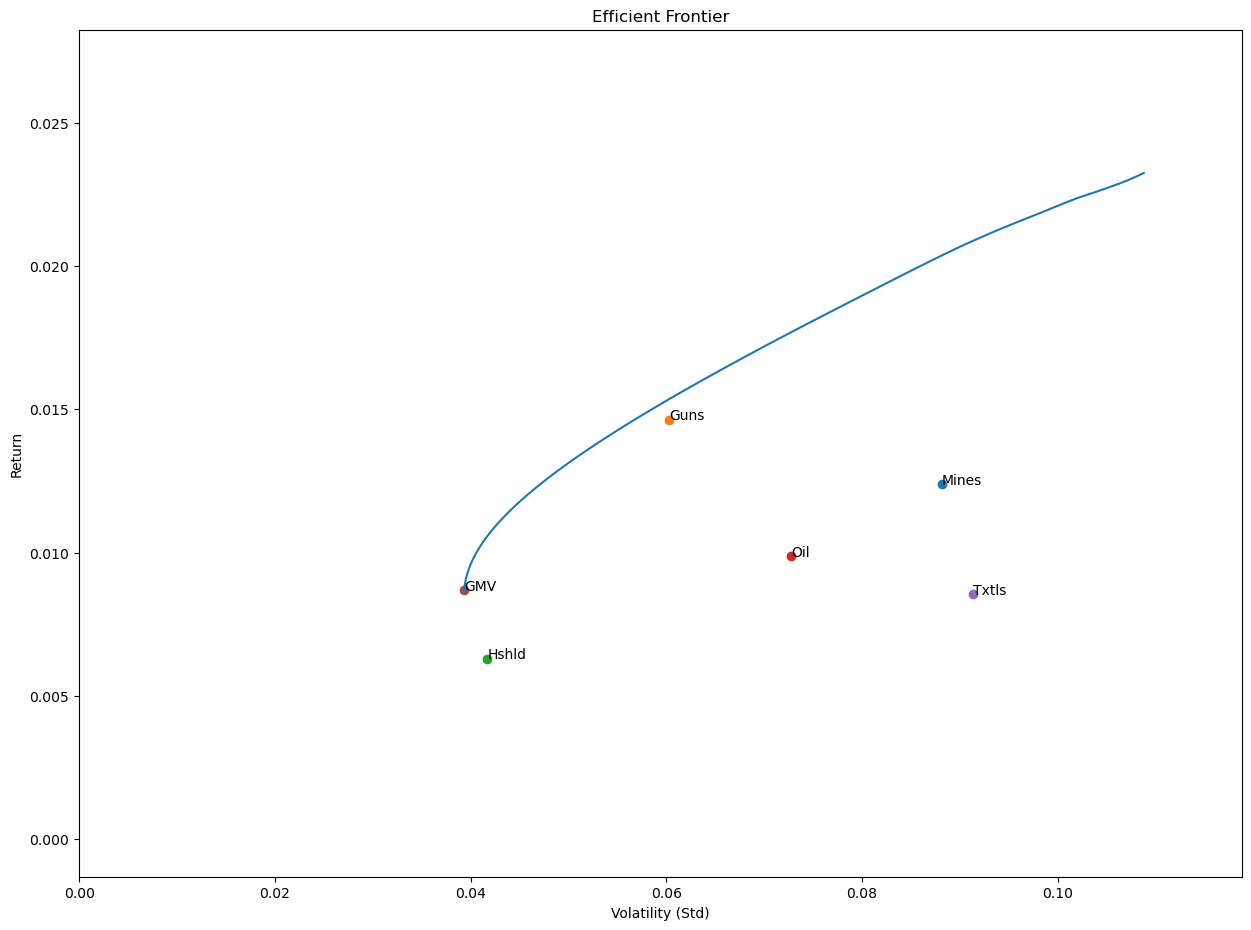

In [42]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

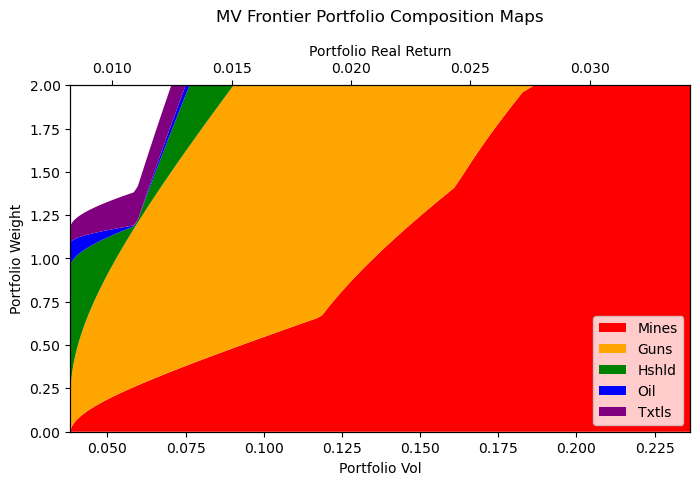

In [43]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=True)

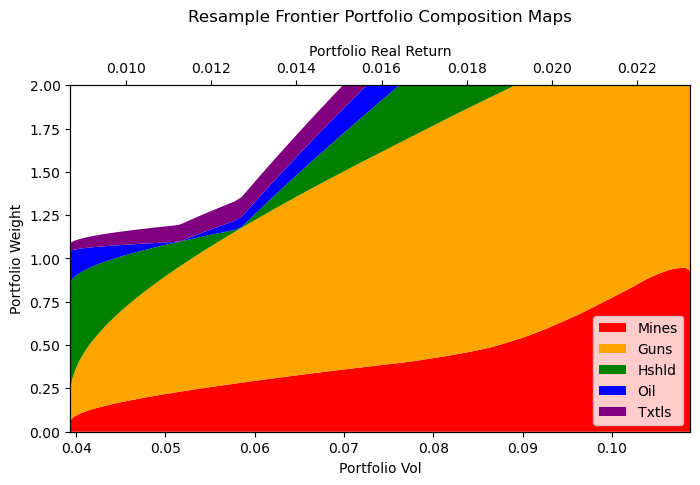

In [44]:
f.Resample_transition_map(result1,bounds = (-2,2))

### (a-1-b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.¶

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

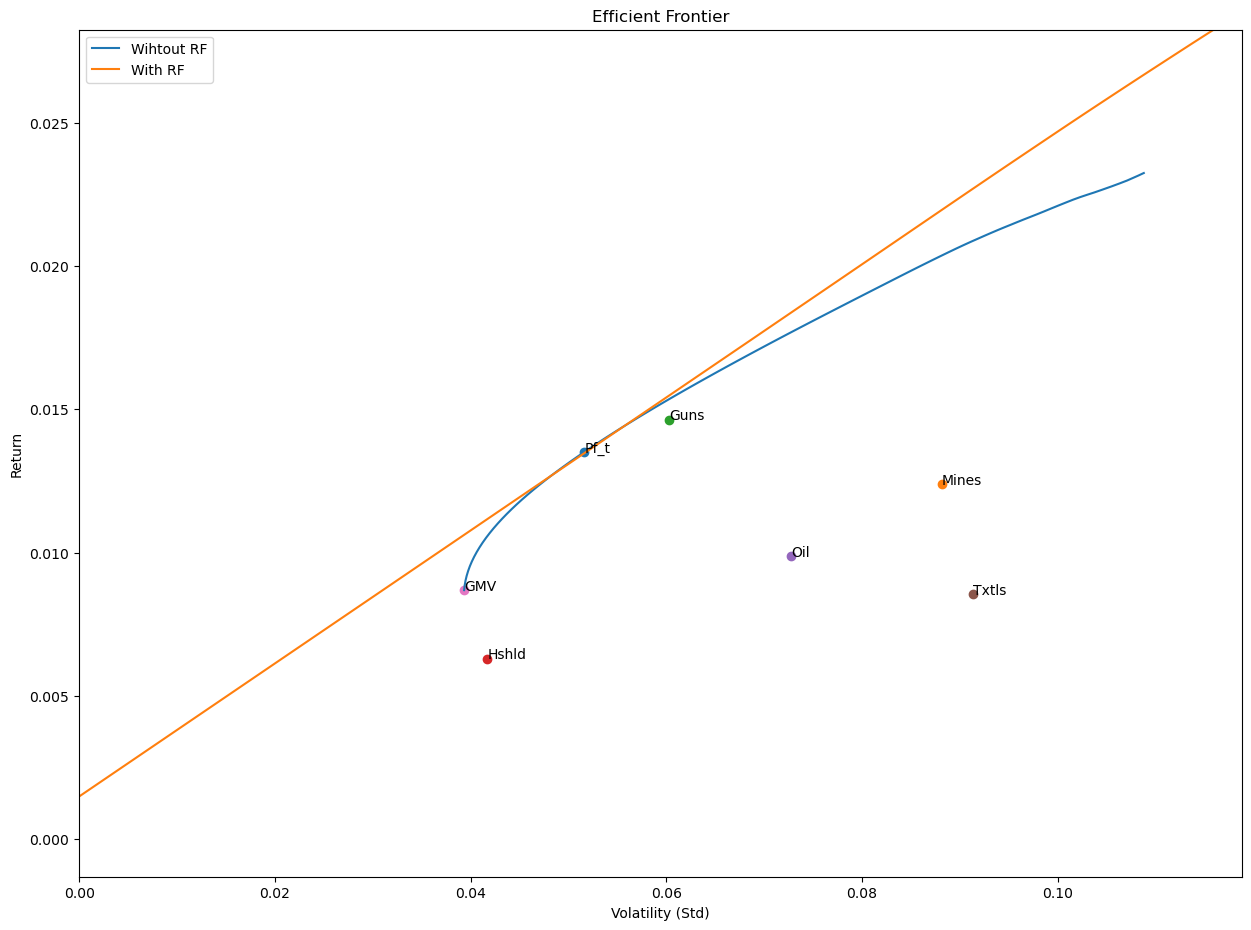

In [45]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

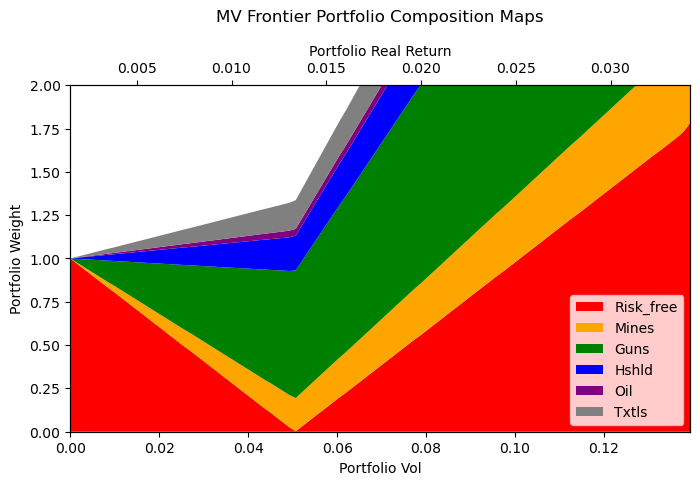

In [46]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=False)

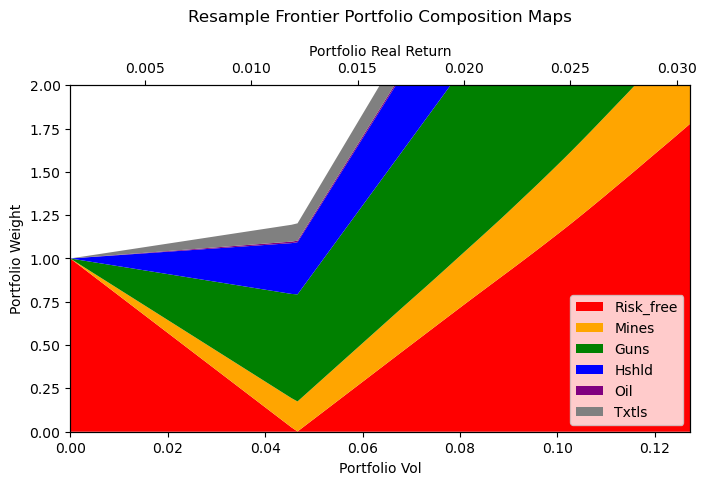

In [47]:
f.Resample_transition_map(result2, bounds = (-2,2))

### (a-1-c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset(a-1-c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [48]:
result = f.tangent_resample(result1,Expected_Risk_free)
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
29,0.230796,0.72351,0.143433,-0.000933,-0.09679,0.013512,0.05161,0.232883


### (a-1-d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

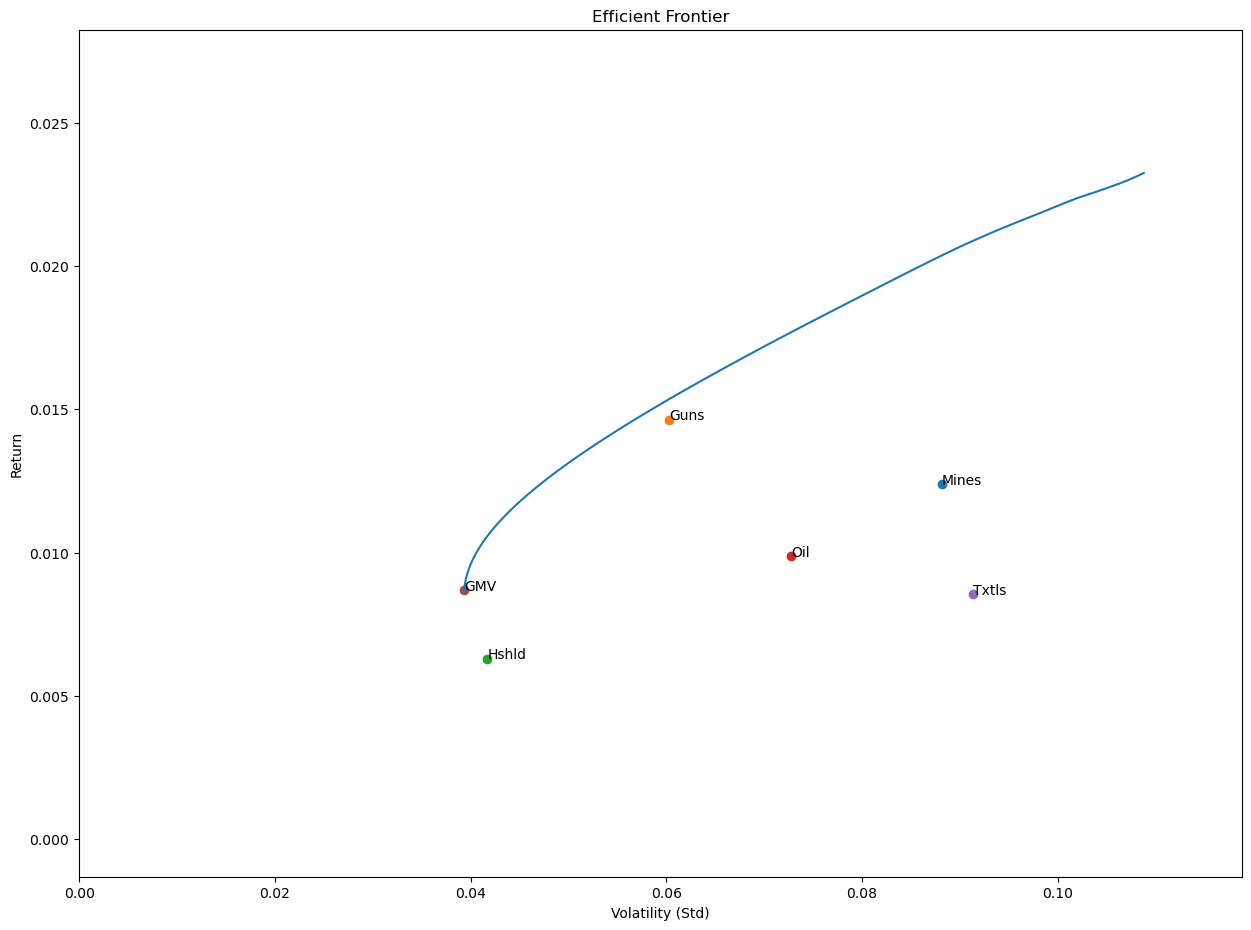

In [49]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

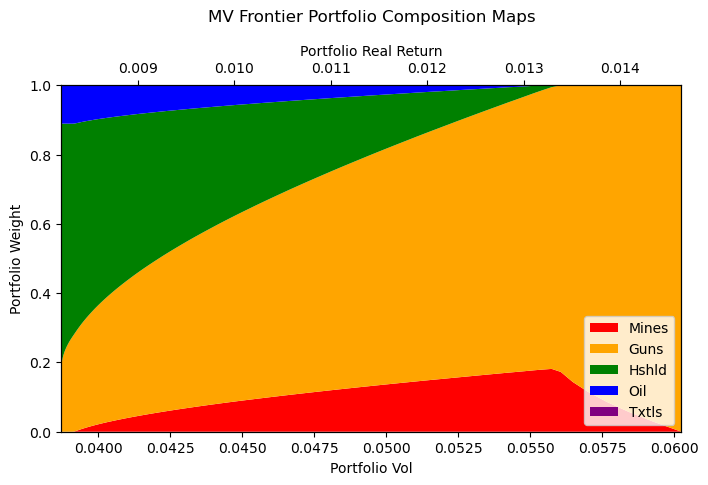

In [50]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=True)

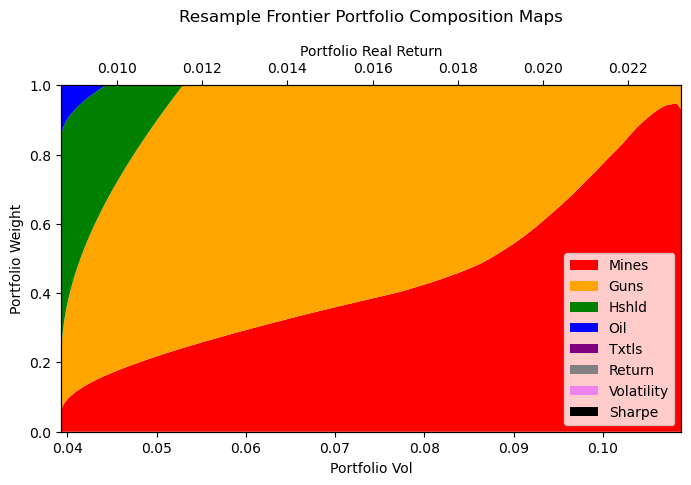

In [51]:
f.Resample_transition_map(result1, bounds = (0, 1))

### (a-1-e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

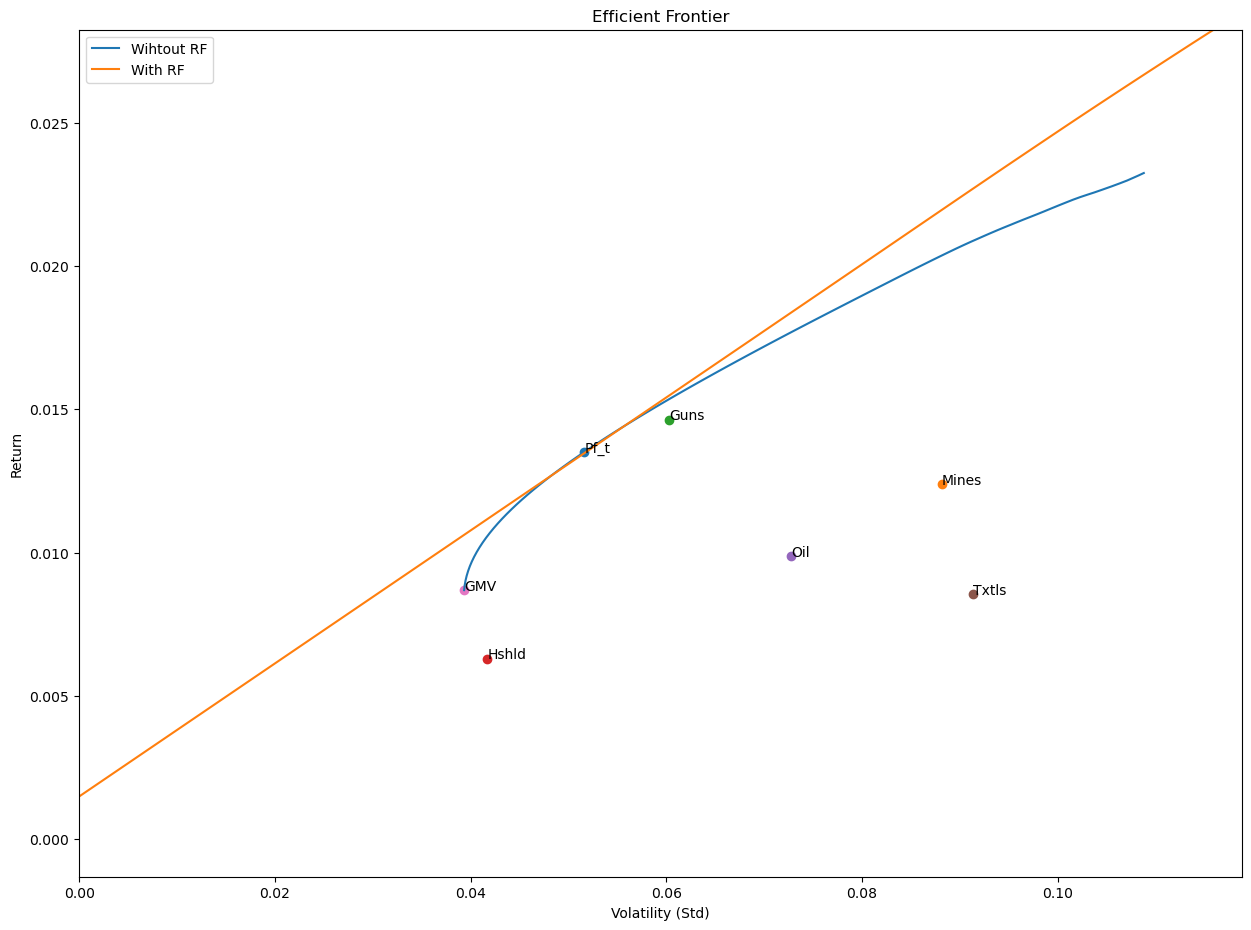

In [52]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

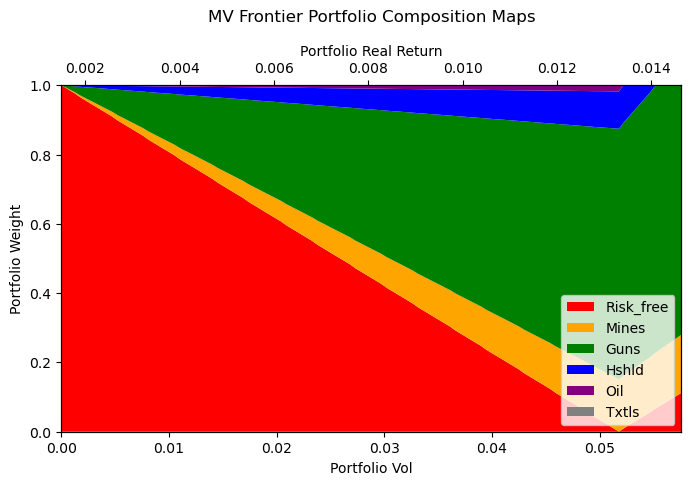

In [53]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=False)

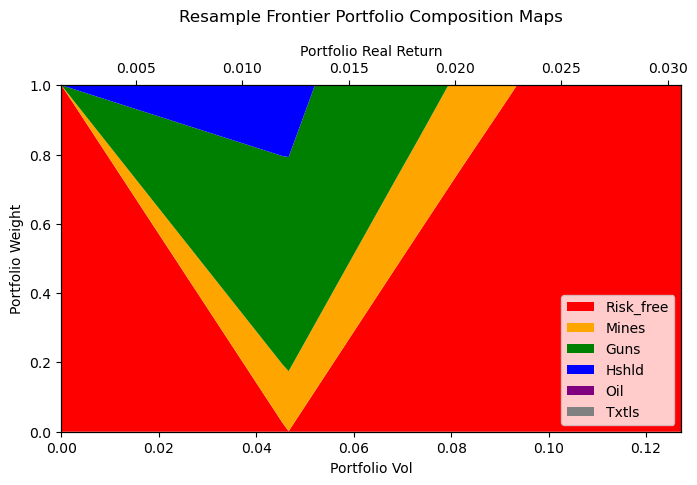

In [54]:
f.Resample_transition_map(result2, bounds = (0, 1))

### (a-1-f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint¶


In [55]:
result = f.tangent_resample(result1,Expected_Risk_free)
result



,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
29,0.230796,0.72351,0.143433,-0.000933,-0.09679,0.013512,0.05161,0.232883


### (a-1-g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

In [56]:
K = 10
Resample2=f.boostrap(Data_select2,Nsim)#On genere nos simulation par Bootstraap

### a-1-g-(a) Graph the mean-variance frontier without risk-free asset of the selected 10 industry portfolios.

In [57]:
result1=f.resample_no_risk(E_return_2, E_cov_2,Resample2, K, Nbr_PTF,path_regression, bounds = (-2,2))
result2=f.resample_with_risk(E_return_2, E_cov_2,Resample2,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (-2,2))

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

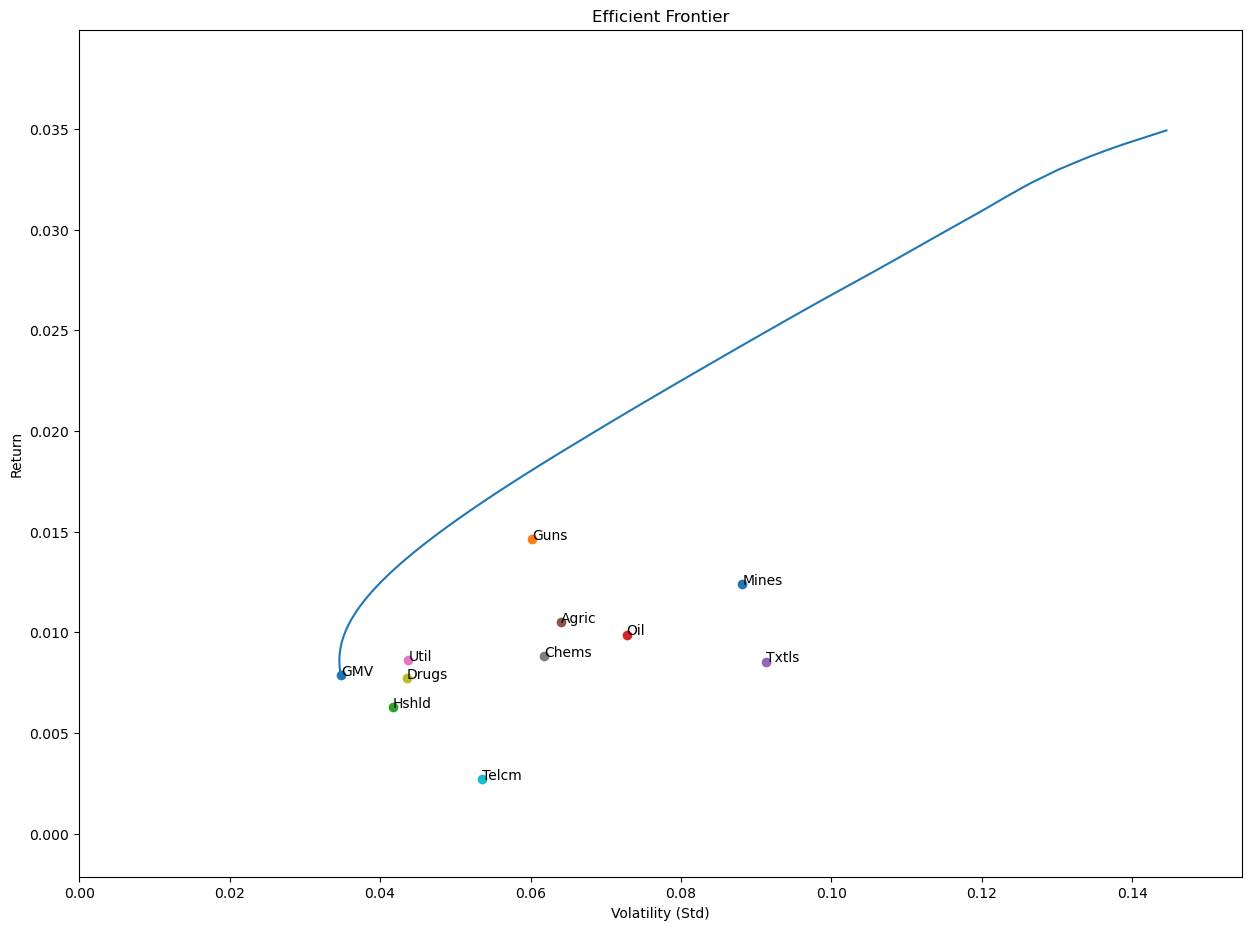

In [58]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

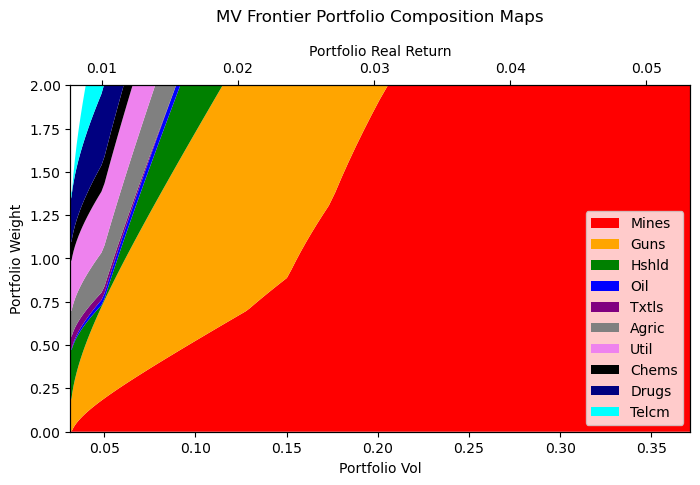

In [59]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=True)

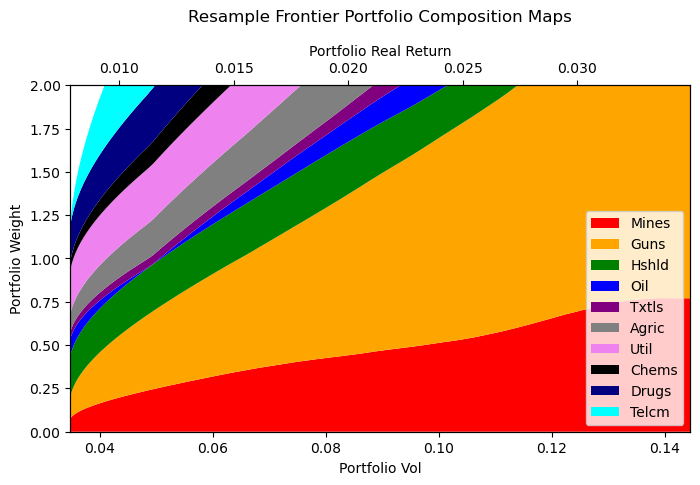

In [60]:
f.Resample_transition_map(result1,bounds = (-2,2))

### a-1-g-(b) Graph the mean-variance frontier with risk-free asset of the selected 10 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.¶

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

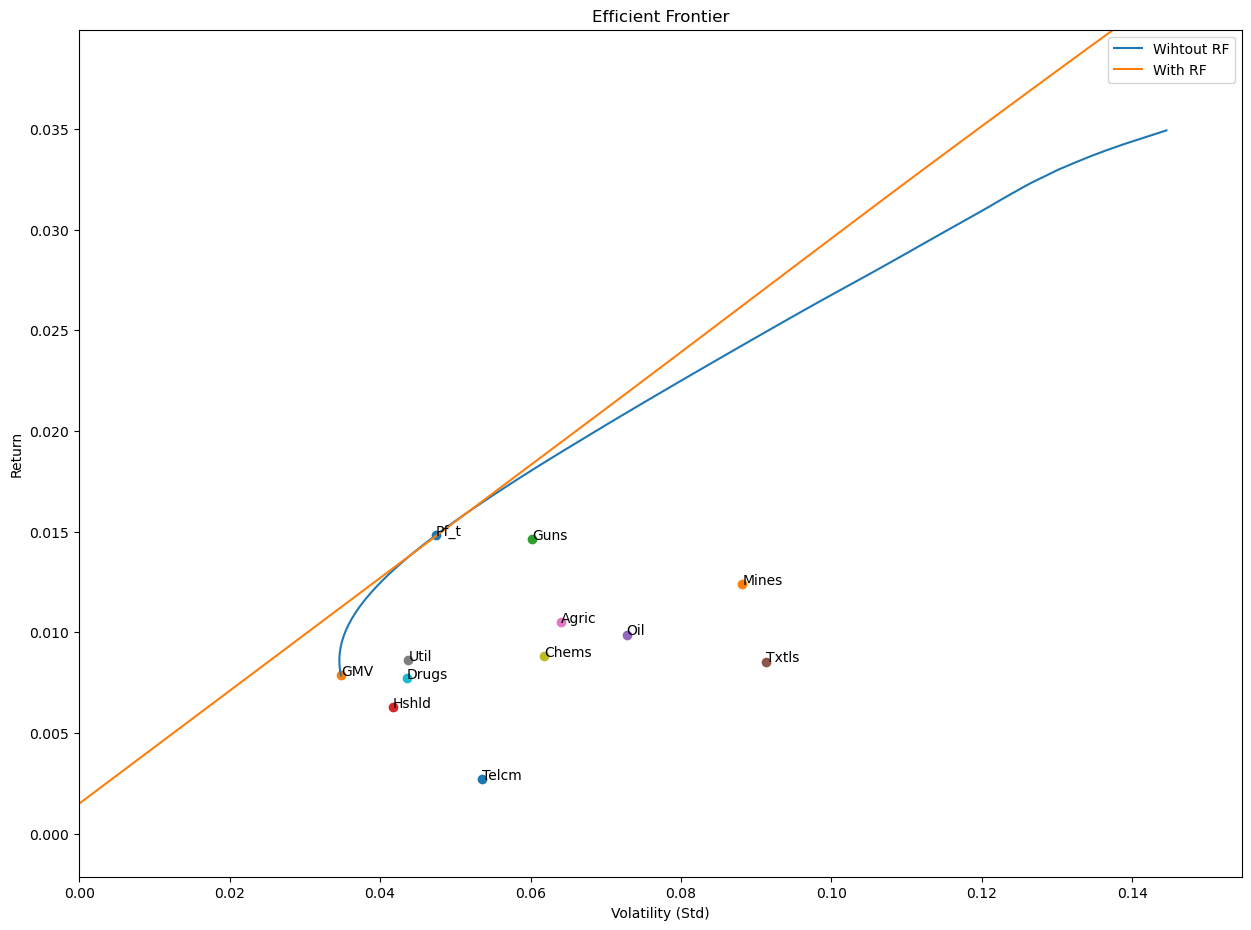

In [61]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

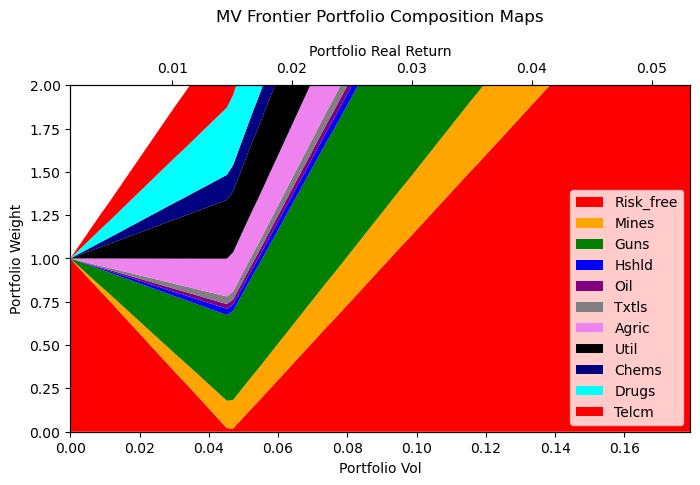

In [62]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=False)

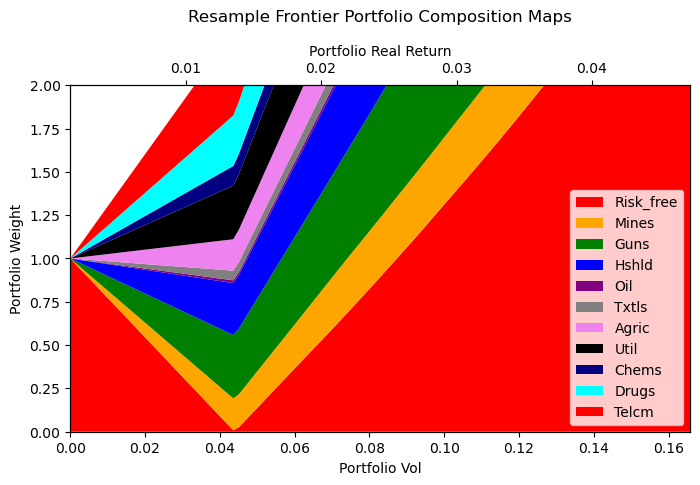

In [63]:
f.Resample_transition_map(result2, bounds = (-2,2))

### a-1-g-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset¶

In [64]:
result = f.tangent_resample(result1,Expected_Risk_free)

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
25,0.229984,0.421142,0.266996,0.007698,-0.050109,0.197684,0.31427,-0.121602,0.299894,-0.565943,0.014832,0.047444,0.281154


### a-1-g-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶


In [65]:
result1=f.resample_no_risk(E_return_2, E_cov_2,Resample2, K, Nbr_PTF,path_regression, bounds = (0,1))
result2=f.resample_with_risk(E_return_2, E_cov_2,Resample2,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (0,1))

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_retur

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

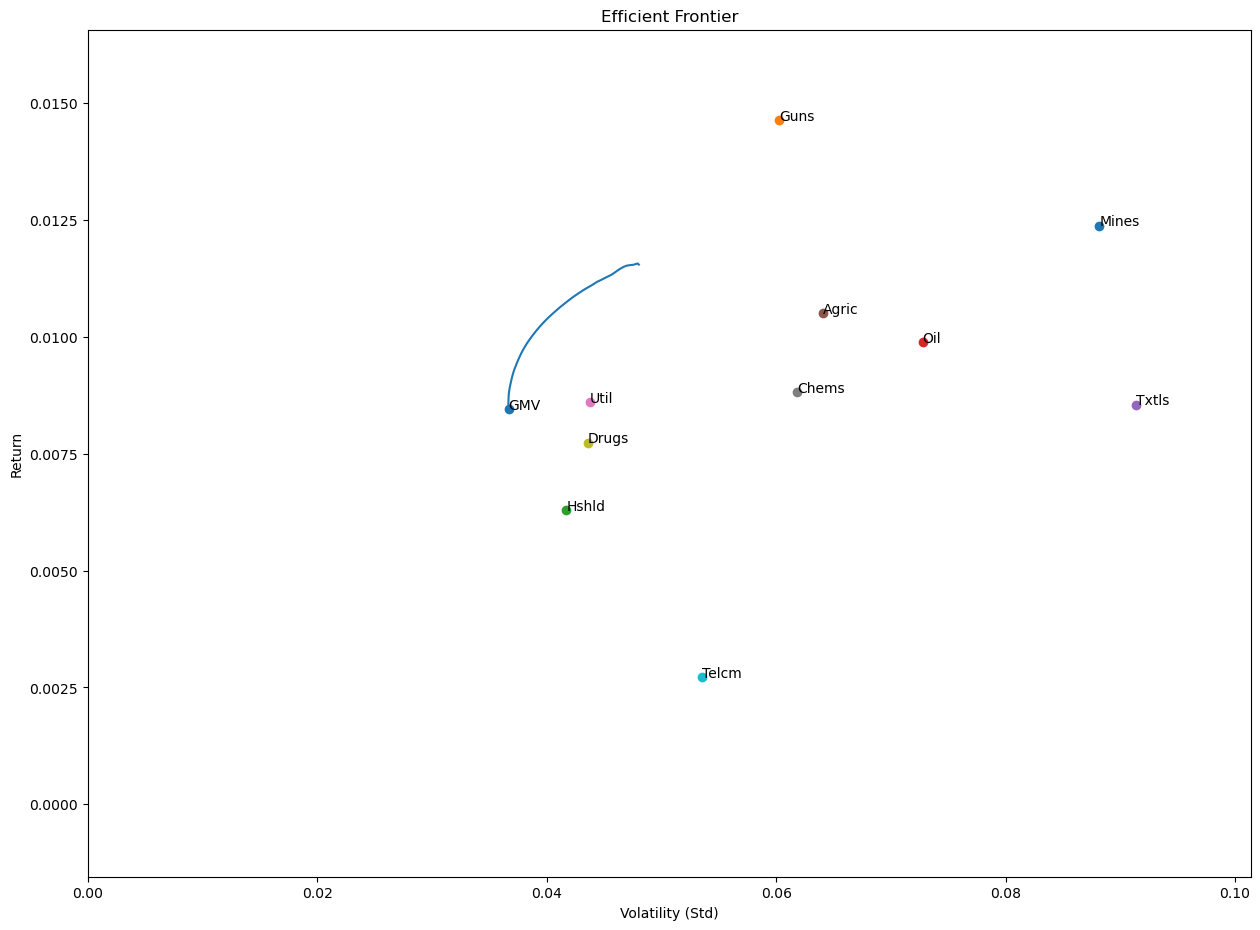

In [66]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)


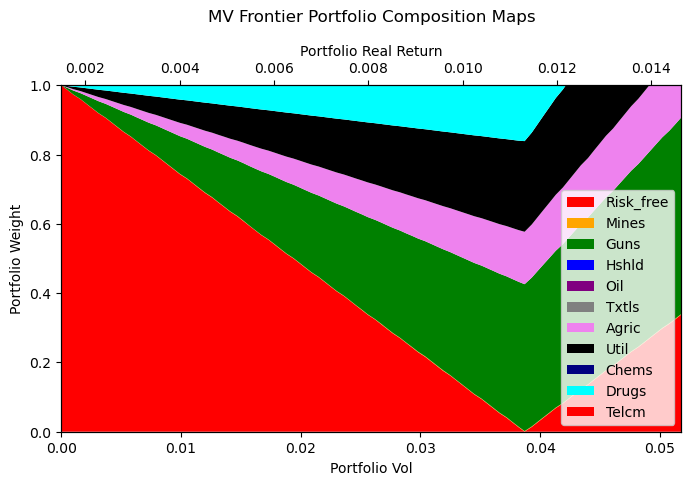

In [67]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=False)

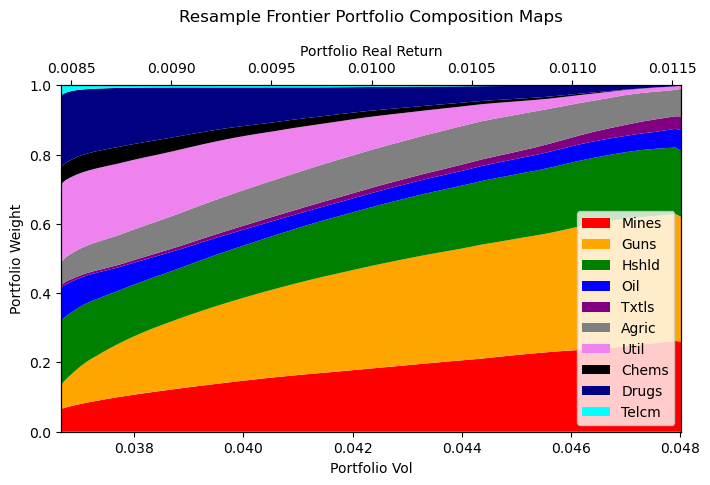

In [68]:
f.Resample_transition_map(result1,bounds = (0,1))

### a-1-g-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

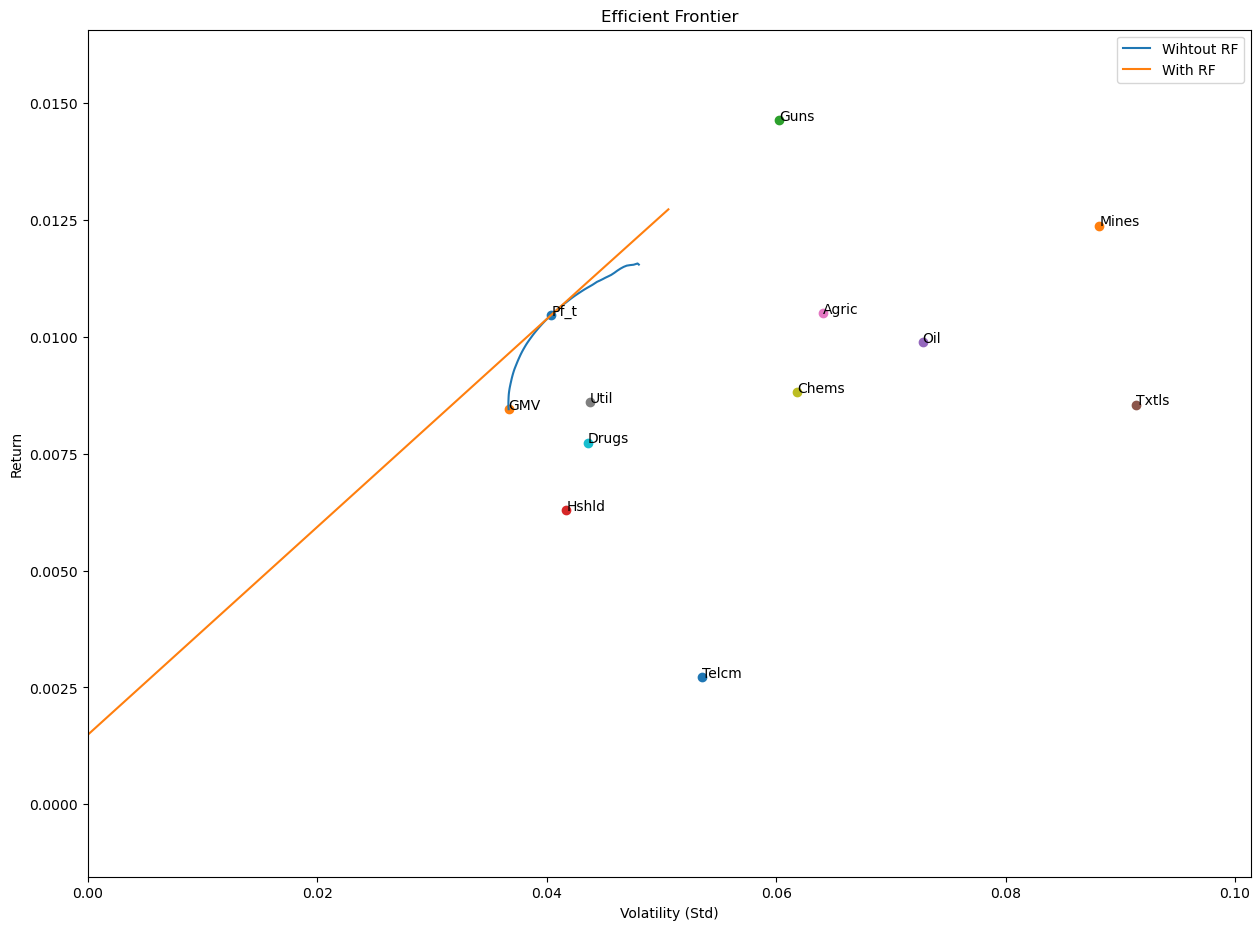

In [69]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

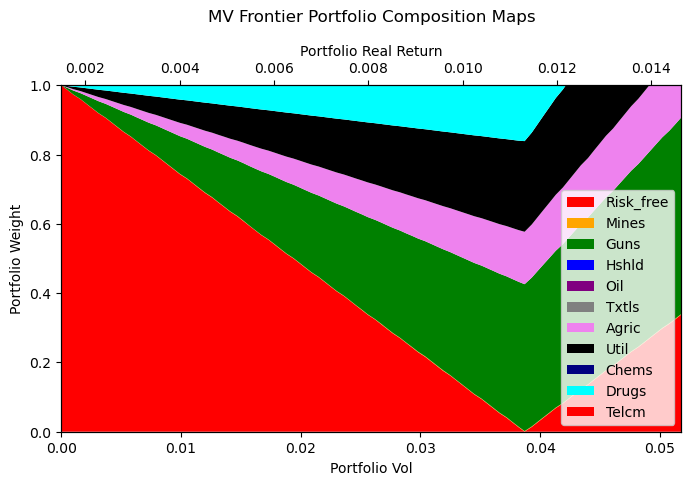

In [70]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=False)

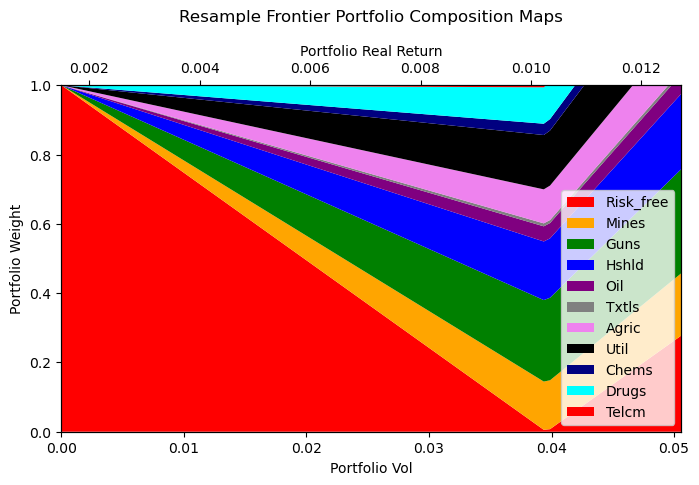

In [71]:
f.Resample_transition_map(result2, bounds = (0,1))

### a-1-g-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [72]:
result = f.tangent_resample(result1,Expected_Risk_free)

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
64,0.153833,0.249386,0.153248,0.043909,0.012161,0.104287,0.145885,0.026656,0.104257,0.006379,0.010467,0.040374,0.222268


### (a-1-h) The investment policy statement now limits you to invest in up to 3 industry portfolios from the original list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?¶


In [73]:
K=3

### a-1-h-(a) Graph the mean-variance frontier without risk-free asset of the selected 3 industry portfolios. vs 5

In [74]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (-2,2))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (-2,2))

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

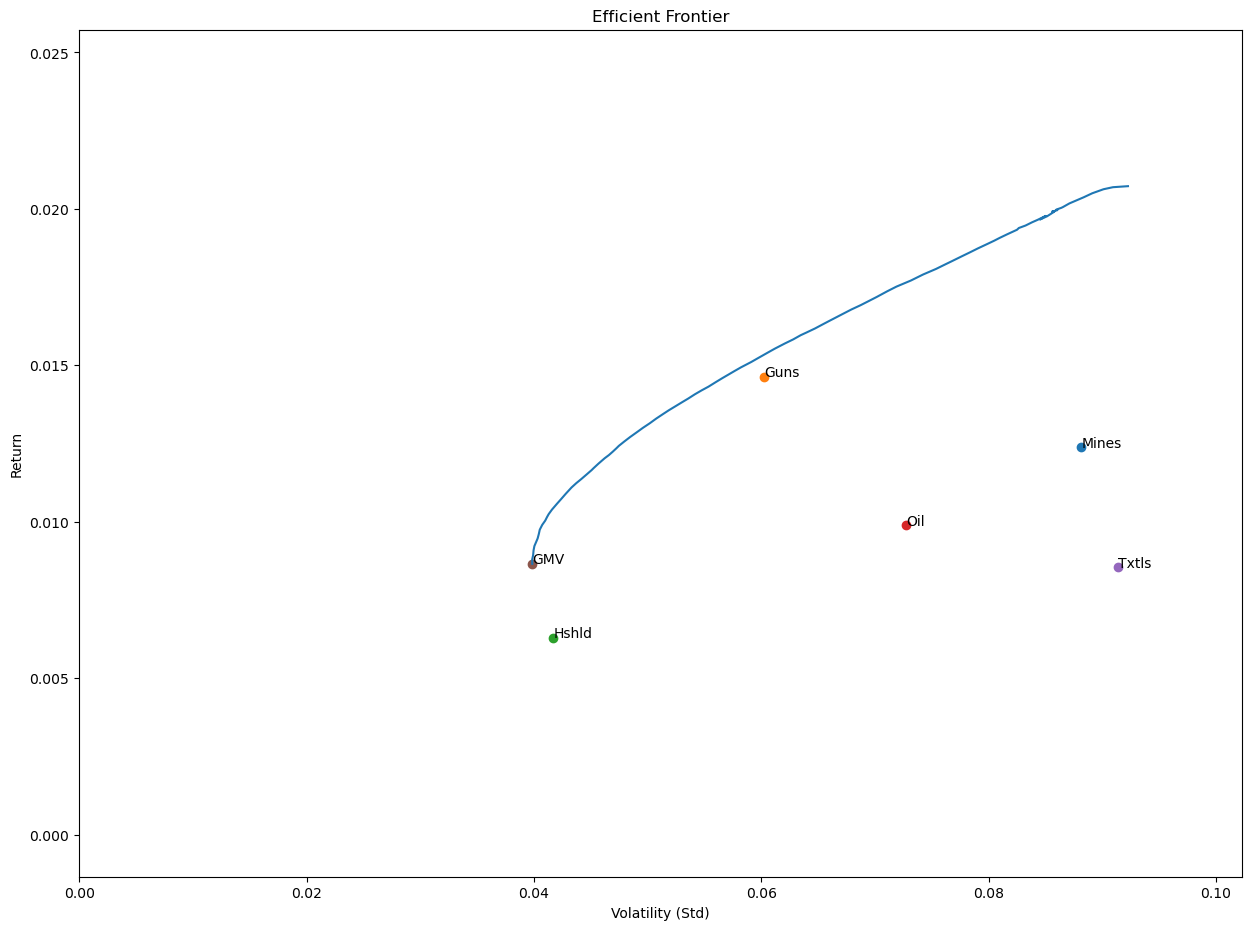

In [75]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

### a-1-h-(b) Graph the mean-variance frontier with risk-free asset of the selected 3 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.¶


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

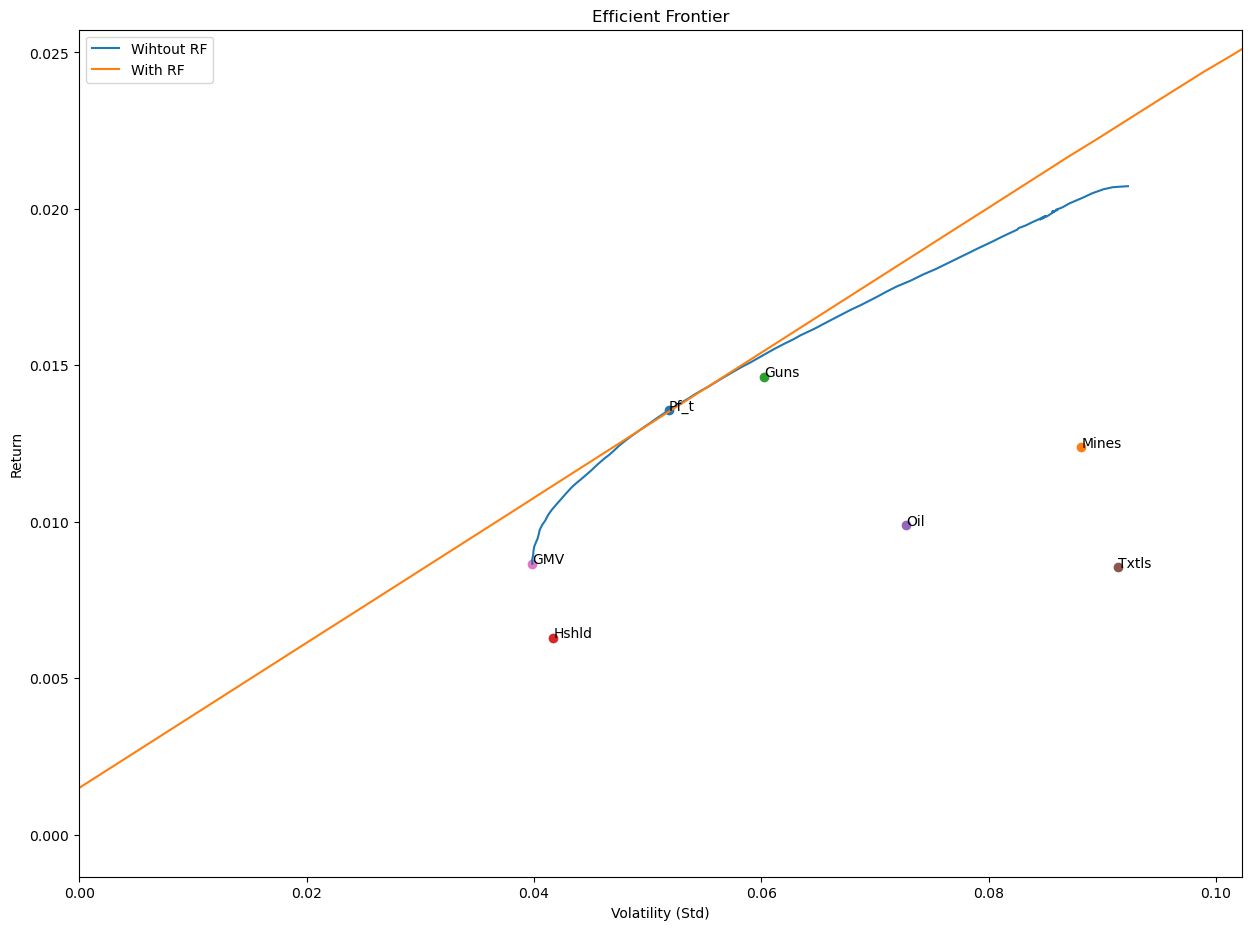

In [76]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

### a-1-h-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset¶


In [77]:
#Trouver portefeuille maximum sharp ratio (Regler probleme de la fonction ou expliquer)
result = f.tangent_resample(result1,Expected_Risk_free)
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
37,0.192738,0.75148,0.133213,0.001415,-0.078848,0.013562,0.051869,0.232696


### a-1-h-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶


In [78]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (0,1))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (0,1))

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
/Users/haroldnonguierma/Desktop/Portfolio-Final/Functions.py:276: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_r

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

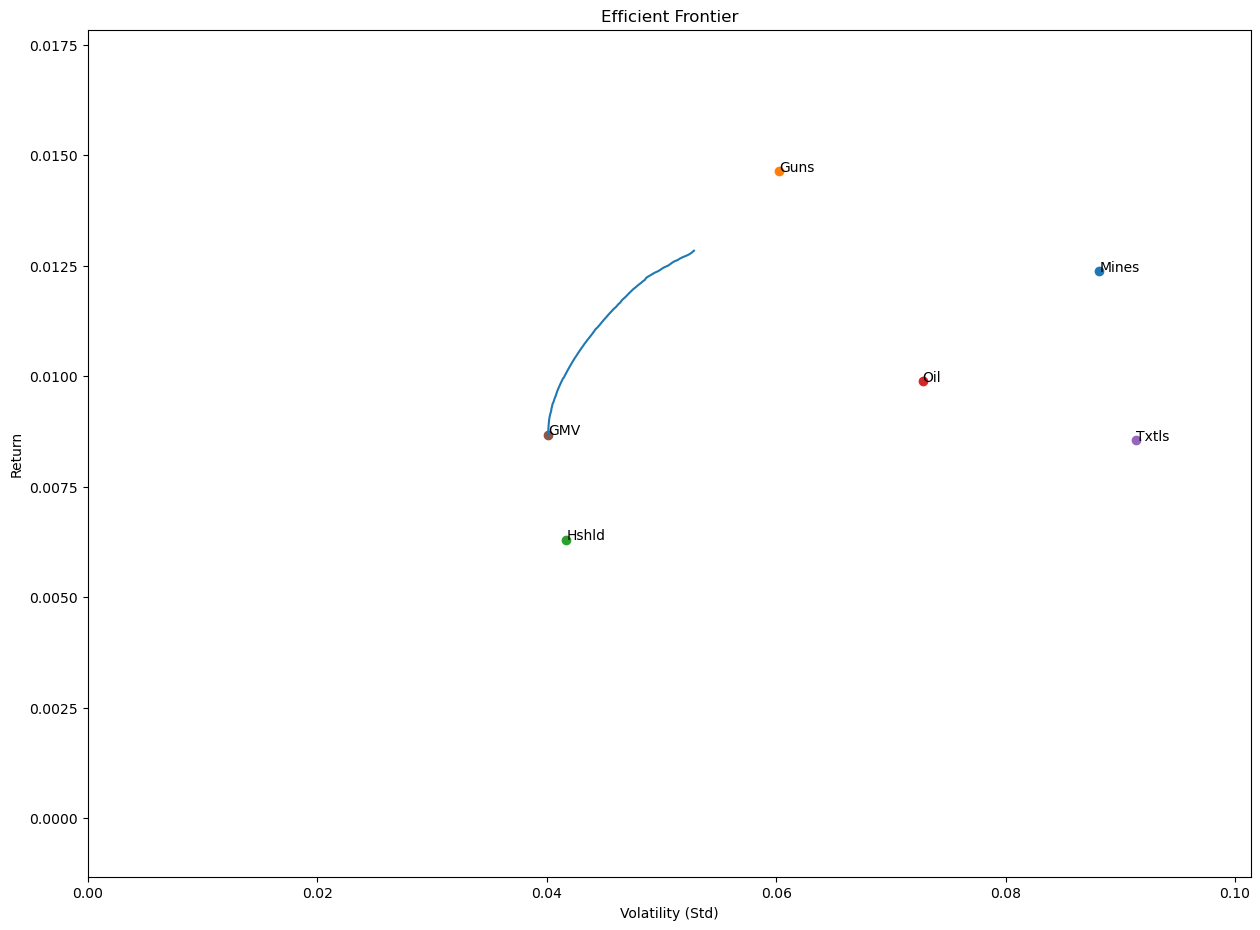

In [79]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

### a-1-h-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

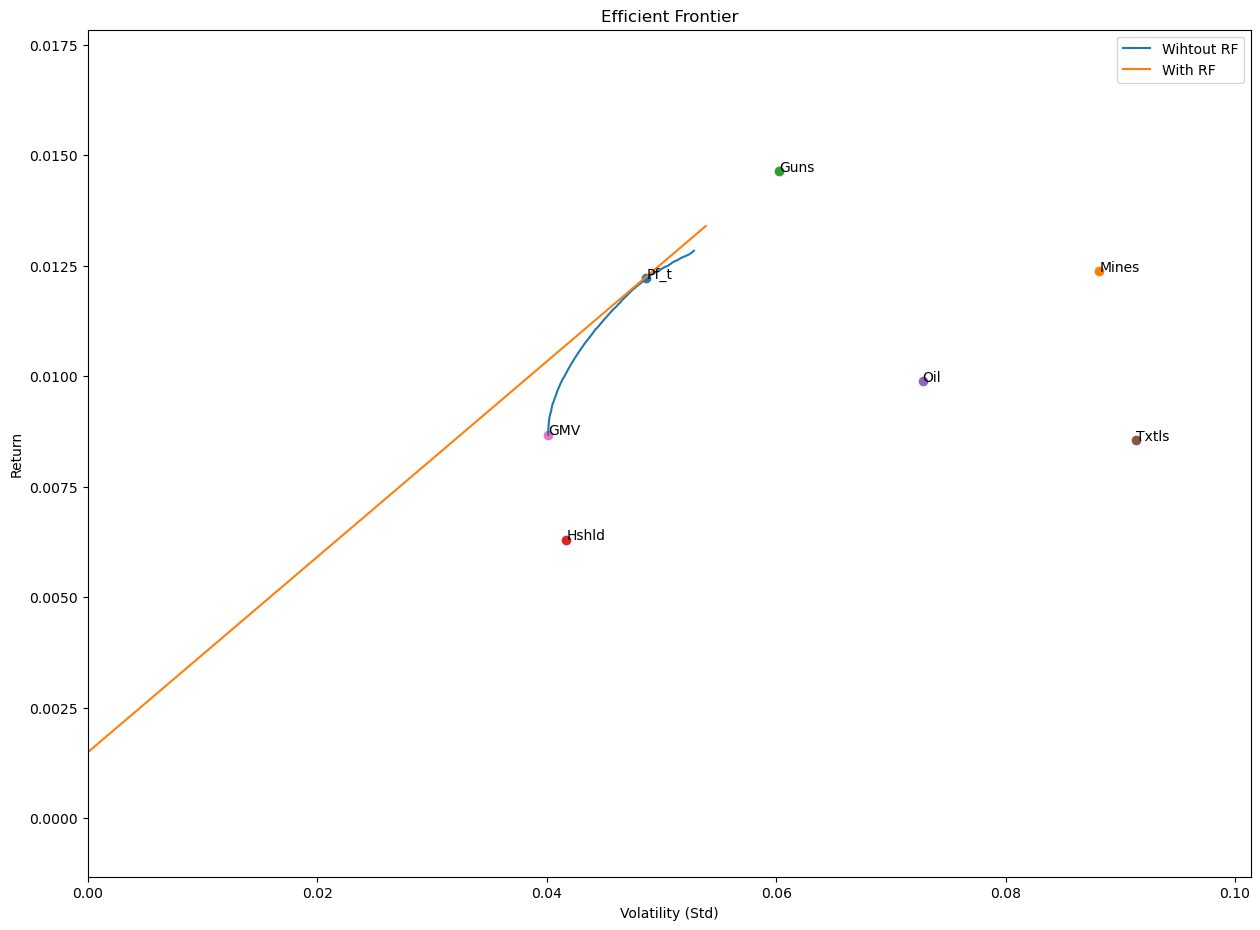

In [80]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

### a-1-h-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint¶


In [81]:
#Trouver portefeuille maximum sharp ratio
result = f.tangent_resample(result1,Expected_Risk_free)
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
80,0.152322,0.553126,0.168417,0.078124,0.048011,0.012224,0.048656,0.220546


### (b) Instead of choosing 5 industries randomly as you did in Question 1, find the 5 industries among the 48 industries that maximize the Sharpe ratio with and without short selling constraints. Propose and implement methods to identify industries and their weights.

In [82]:
#Trouver portefeuille maximum sharp ratio
Data_select3 = Data
K=5
E_return_all=E_return_select
E_cov_all=f.Ledoit_wolf(Data_select3)
Resample_all=f.boostrap(Data_select3,Nsim)

In [83]:
#With Short Selling
result = f.tangent_Gurobi(E_return_all,E_cov_all,Expected_Risk_free, K, Nbr_PTF,bounds= (-2,2))
result.T


,72
Food,0.000000
Soda,0.000000
Beer,0.000000
Fun,0.000000
Books,0.000000
Clths,0.000000
Rubbr,0.000000
BldMt,0.000000
Cnstr,0.000000
Steel,0.000000


In [84]:
#Without Not Short Selling
result = f.tangent_Gurobi(E_return_all,E_cov_all,Expected_Risk_free, K, Nbr_PTF,bounds= (0,1))
result

result.T


,80
Food,0.000000
Soda,0.000000
Beer,0.000000
Fun,0.000000
Books,0.000000
Clths,0.000000
Rubbr,0.000000
BldMt,0.000000
Cnstr,0.000000
Steel,0.000000
